In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import datetime
from sklearn.model_selection import GridSearchCV
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

In [178]:
data=pd.read_csv("studperfupdated.csv")

In [179]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74
1,female,group C,some college,standard,completed,69.0,90.0,88
2,female,group B,master's degree,standard,none,90.0,95.0,93
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44
4,male,group C,some college,standard,none,76.0,78.0,75


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  955 non-null    object 
 3   lunch                        957 non-null    object 
 4   test preparation course      1000 non-null   object 
 5   math score                   963 non-null    float64
 6   reading score                946 non-null    float64
 7   writing score                1000 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [181]:
data.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education    45
lunch                          43
test preparation course         0
math score                     37
reading score                  54
writing score                   0
dtype: int64

In [182]:
data.shape, data.describe()

((1000, 8),
        math score  reading score  writing score
 count  963.000000     946.000000    1000.000000
 mean    66.239875      69.206131      68.054000
 std     15.010654      14.669509      15.195657
 min      0.000000      17.000000      10.000000
 25%     57.000000      59.000000      57.750000
 50%     66.000000      70.000000      69.000000
 75%     77.000000      79.000000      79.000000
 max    100.000000     100.000000     100.000000)

In [183]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     78
reading score                  72
writing score                  77
dtype: int64

In [184]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', nan, 'some high school'],
      dtype=object)

In [185]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [186]:
data.rename(columns={'race/ethnicity': 'race'}, inplace=True)


In [187]:
data.columns

Index(['gender', 'race', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [188]:
data.rename(columns={'parental level of education': 'parent edu'}, inplace=True)

In [189]:
data["parent edu"] = data["parent edu"].str.replace("some high school", "high school")

In [190]:
data['parent edu'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', nan], dtype=object)

handling missing values manually

In [191]:
df=data.copy()

In [192]:
df.isnull().sum()

gender                      0
race                        0
parent edu                 45
lunch                      43
test preparation course     0
math score                 37
reading score              54
writing score               0
dtype: int64

<Axes: >

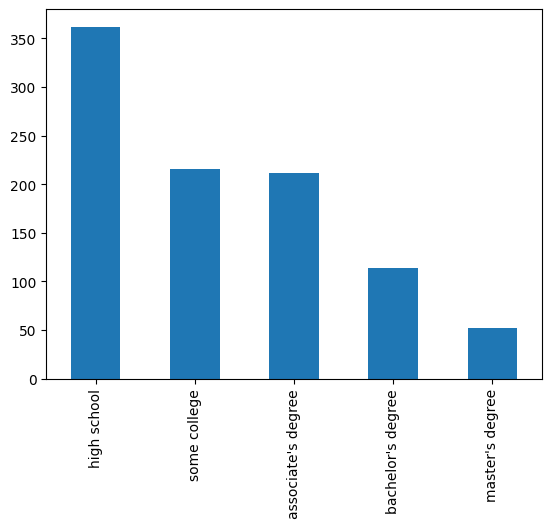

In [193]:
data['parent edu'].value_counts().sort_values(ascending=False).plot.bar()

In [194]:
df['parent edu'].mode()

0    high school
Name: parent edu, dtype: object

In [195]:
df['parent edu']=df['parent edu'].fillna('high school')


<Axes: >

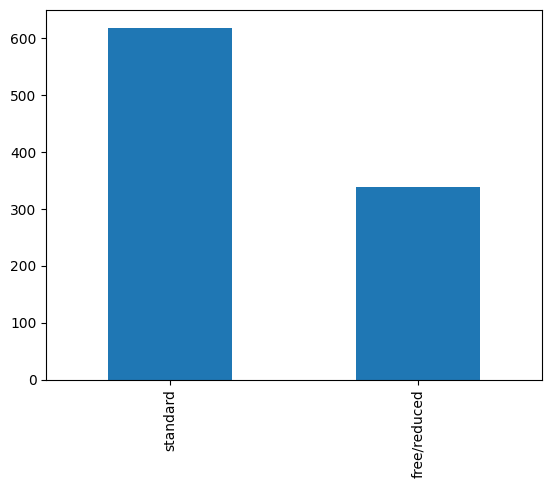

In [196]:
data['lunch'].value_counts().sort_values(ascending=False).plot.bar()

In [197]:
df['lunch'].mode()

0    standard
Name: lunch, dtype: object

In [198]:
df['lunch']=df['lunch'].fillna('standard')

<Axes: >

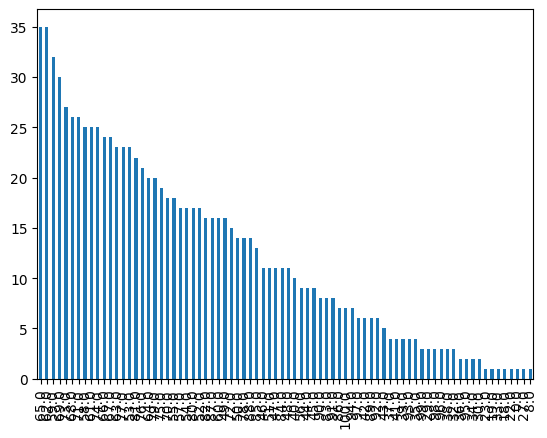

In [199]:
data['math score'].value_counts().sort_values(ascending=False).plot.bar()

In [200]:
df['math score'].mean()

66.2398753894081

In [201]:
df['math score']=df['math score'].fillna(66)

In [202]:
df['reading score'].mean()

69.2061310782241

In [203]:
df['reading score']=df['reading score'].fillna(69)

In [204]:
df.isnull().sum()

gender                     0
race                       0
parent edu                 0
lunch                      0
test preparation course    0
math score                 0
reading score              0
writing score              0
dtype: int64

imputers

In [205]:
df1=data.copy()

In [206]:
df1.head(10)

,gender,race,parent edu,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74
1,female,group C,some college,standard,completed,69.0,90.0,88
2,female,group B,master's degree,standard,none,90.0,95.0,93
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44
4,male,group C,some college,standard,none,76.0,78.0,75
5,female,group B,associate's degree,standard,none,71.0,83.0,78
6,female,group B,some college,standard,completed,88.0,95.0,92
7,male,group B,some college,free/reduced,none,40.0,43.0,39
8,male,group D,high school,free/reduced,completed,64.0,64.0,67
9,female,group B,high school,free/reduced,none,38.0,60.0,50


In [207]:
df1.isnull().mean()*100

gender                     0.0
race                       0.0
parent edu                 4.5
lunch                      4.3
test preparation course    0.0
math score                 3.7
reading score              5.4
writing score              0.0
dtype: float64

In [208]:
from sklearn.impute import SimpleImputer

# Impute missing values for NUMERical columns using SimpleImputer with most frequent strategy
imputer = SimpleImputer(strategy='mean')
df1['math score'] = imputer.fit_transform(df1['math score'].values.reshape(-1, 1))

In [209]:
from sklearn.impute import SimpleImputer

# Impute missing values for NUMERical columns using SimpleImputer with most frequent strategy
imputer = SimpleImputer(strategy='mean')
df1['reading score'] = imputer.fit_transform(df1['reading score'].values.reshape(-1, 1))

In [210]:
from sklearn.impute import SimpleImputer

# Impute missing values for categorical columns using SimpleImputer with most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
df1['parent edu'] = imputer.fit_transform(df1['parent edu'].values.reshape(-1, 1))

In [211]:
from sklearn.impute import SimpleImputer

# Impute missing values for categorical columns using SimpleImputer with most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
df1['lunch'] = imputer.fit_transform(df1['lunch'].values.reshape(-1, 1))

In [212]:
df1.isnull().mean()*100

gender                     0.0
race                       0.0
parent edu                 0.0
lunch                      0.0
test preparation course    0.0
math score                 0.0
reading score              0.0
writing score              0.0
dtype: float64

<Axes: >

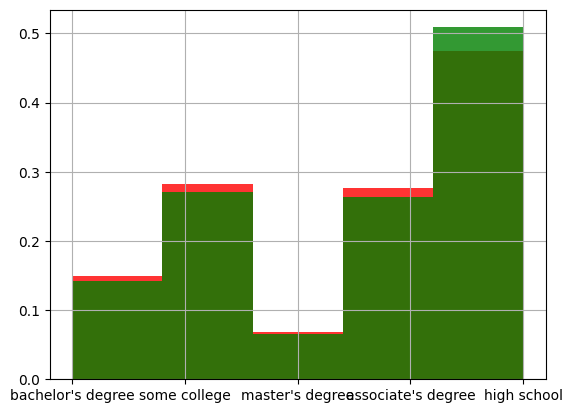

In [213]:
fig = plt.figure( )
ax = fig.add_subplot(111)

# original data
data['parent edu'].hist(bins=5, ax=ax, density=True, color='red', alpha=0.8)

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df1['parent edu'].hist(bins=5, ax=ax, color='green', density=True, alpha=0.8)

<Axes: >

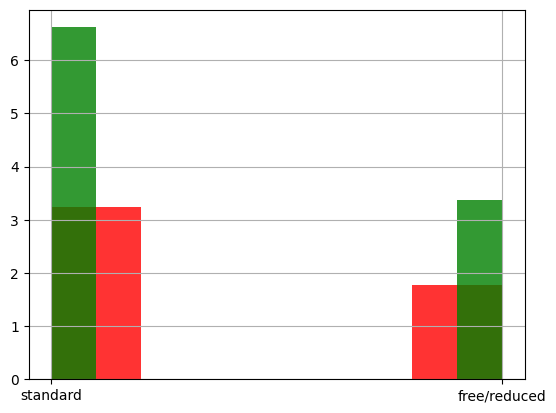

In [214]:
fig = plt.figure( )
ax = fig.add_subplot(111)

# original data
data['lunch'].hist(bins=5, ax=ax, density=True, color='red', alpha=0.8)

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df1['lunch'].hist(bins=10, ax=ax, color='green', density=True, alpha=0.8)

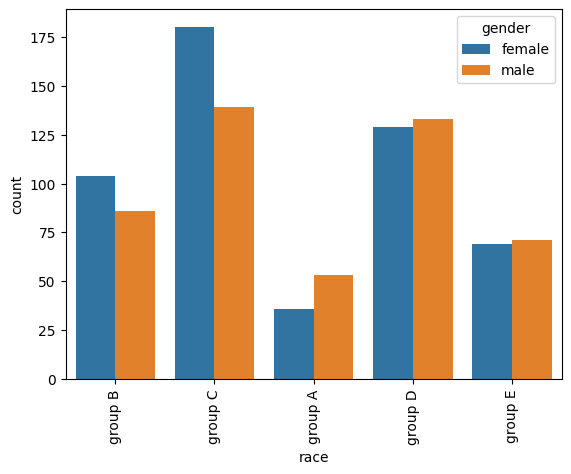

In [215]:
#FINDING FREQUENCY COUNT OF RACE
sns.countplot(data = data, x = "race",hue = "gender")
plt.xticks(rotation =90);

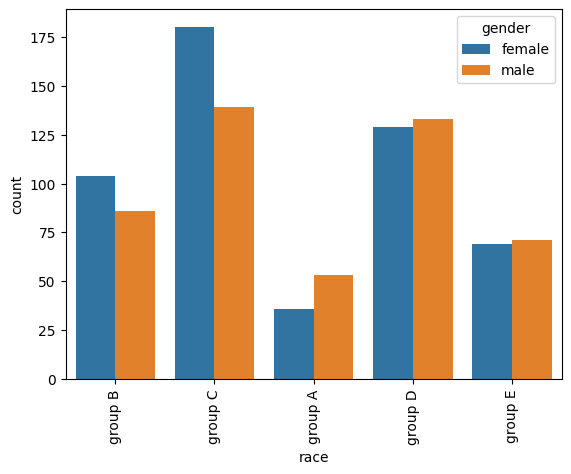

In [216]:
#FINDING FREQUENCY COUNT OF RACE
sns.countplot(data = df, x = "race",hue = "gender")
plt.xticks(rotation =90);

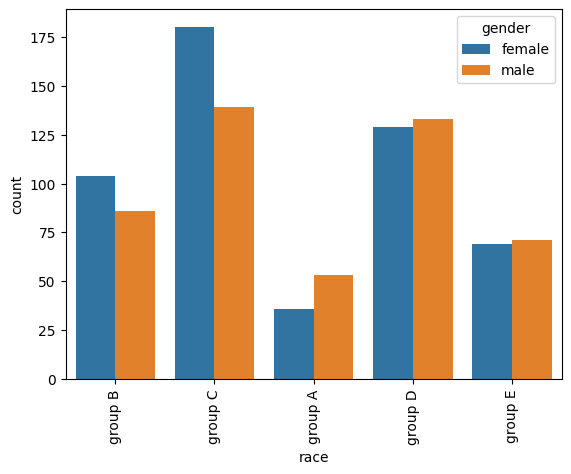

In [217]:
#FINDING FREQUENCY COUNT OF RACE
sns.countplot(data = df1, x = "race",hue = "gender")
plt.xticks(rotation =90);

#standarization

In [218]:
data.describe()

,math score,reading score,writing score
count,963.000000,946.000000,1000.000000
mean,66.239875,69.206131,68.054000
std,15.010654,14.669509,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [219]:
data['totalscore'] = (data['math score'] + data['reading score'] + data['writing score'])/3
data['totalscore']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: totalscore, Length: 1000, dtype: float64

In [220]:
data.head()

,gender,race,parent edu,lunch,test preparation course,math score,reading score,writing score,totalscore
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44,49.333333
4,male,group C,some college,standard,none,76.0,78.0,75,76.333333


In [221]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical column
scaler = StandardScaler()
scaler.fit(data[['math score','reading score','writing score']])
data_scaled = scaler.transform(data[['math score','reading score','writing score']])
scaler.fit(df[['math score','reading score','writing score']])
df_scaled = scaler.transform(df[['math score','reading score','writing score']])
scaler.fit(df1[['math score','reading score','writing score']])
df1_scaled = scaler.transform(df1[['math score','reading score','writing score']])

In [222]:
data[['math score','reading score' ,'writing score']].head()

,math score,reading score,writing score
0,72.0,72.0,74
1,69.0,90.0,88
2,90.0,95.0,93
3,47.0,57.0,44
4,76.0,78.0,75


In [223]:
data_scaled=pd.DataFrame(data_scaled, columns=['math score','reading score' ,'writing score'])

In [224]:
data_scaled.head()

,math score,reading score,writing score
0,0.383935,0.190555,0.391492
1,0.183973,1.418239,1.313269
2,1.583707,1.759262,1.642475
3,-1.282414,-0.832515,-1.583744
4,0.650551,0.599783,0.457333


In [225]:
df_scaled=pd.DataFrame(df_scaled, columns=['math score','reading score' ,'writing score'])

In [226]:
df_scaled

,math score,reading score,writing score
0,0.391842,0.196698,0.391492
1,0.188076,1.458928,1.313269
2,1.614439,1.809548,1.642475
3,-1.306209,-0.855161,-1.583744
4,0.663531,0.617441,0.457333
...,...,...,...
995,1.478595,2.090043,1.774157
996,-0.287378,-0.995409,-0.859491
997,-0.491144,0.126574,-0.201079
998,0.120154,0.617441,0.589015


In [227]:
df1_scaled=pd.DataFrame(df1_scaled, columns=['math score','reading score' ,'writing score'])

In [228]:
df1_scaled

,math score,reading score,writing score
0,0.391241,0.195918,0.391492
1,0.187474,1.458155,1.313269
2,1.613844,1.808777,1.642475
3,-1.306818,-0.855946,-1.583744
4,0.662931,0.616664,0.457333
...,...,...,...
995,1.477999,2.089274,1.774157
996,-0.287982,-0.996195,-0.859491
997,-0.491750,0.125794,-0.201079
998,0.119552,0.616664,0.589015


#normalization

In [229]:
df1['totalscore']=(df1['math score']+df1['writing score']+df1['reading score'])/3

In [230]:
X_train,X_test,y_train,y_test = train_test_split(df1[['math score','reading score']],df1['totalscore'],test_size=0.2)

In [231]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [232]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

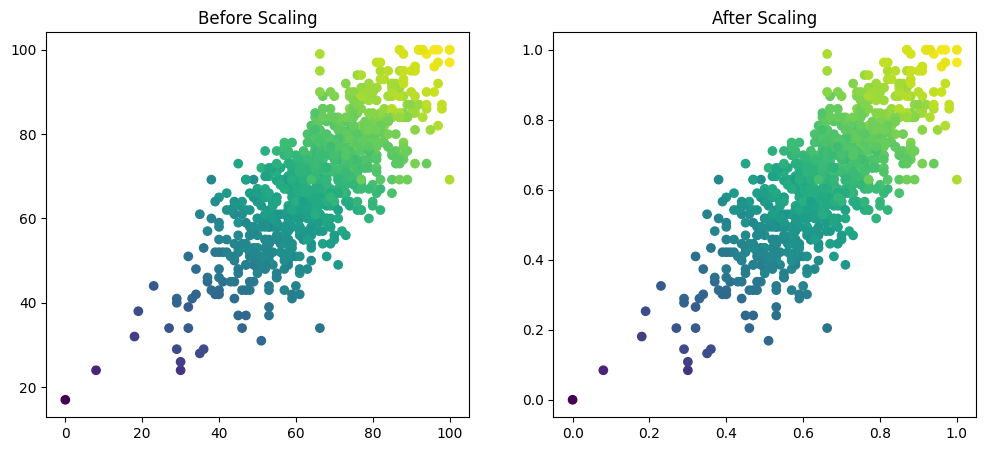

In [233]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['math score'] , X_train['reading score'] ,c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['math score'] , X_train_scaled['reading score'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

in normalization the values are transformed in the range of 0 and 1

#effect of scaling

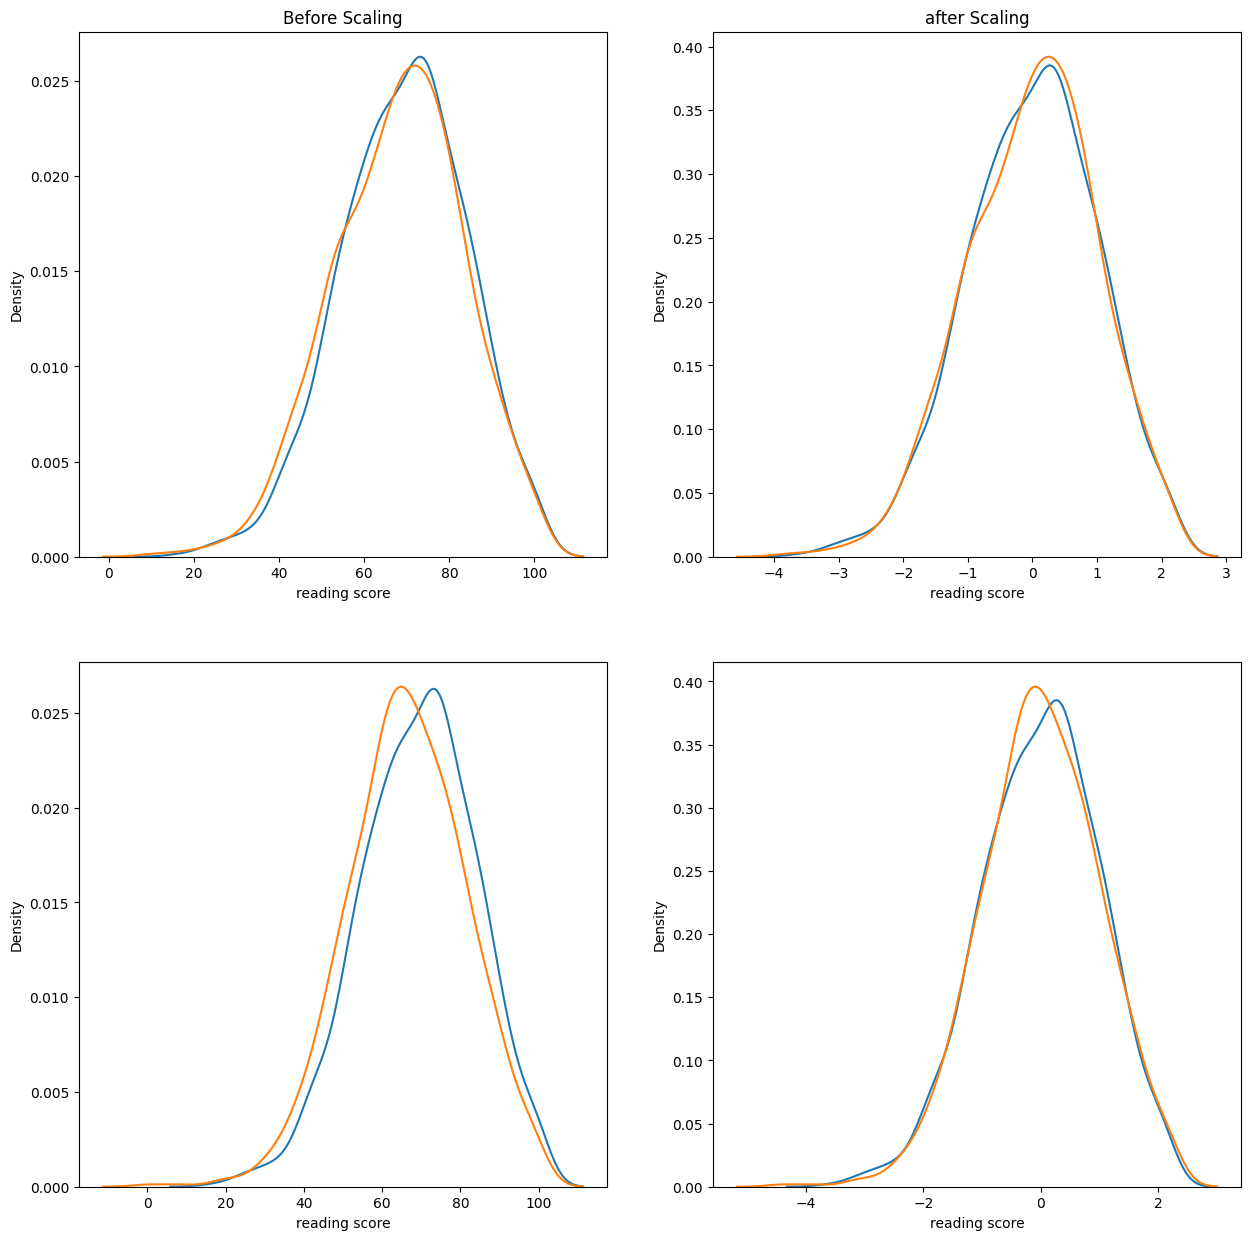

In [337]:
#Original Data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

sns.kdeplot(data['reading score'], ax=ax[0, 0])
sns.kdeplot(data['writing score'], ax=ax[0, 0])
ax[0, 0].set_title("Before Scaling")
sns.kdeplot(data_scaled['reading score'], ax=ax[0, 1])
sns.kdeplot(data_scaled['writing score'], ax=ax[0, 1])
ax[0, 1].set_title("after Scaling")

sns.kdeplot(data['reading score'], ax=ax[1, 0])
sns.kdeplot(data['math score'], ax=ax[1, 0])
ax[0, 0].set_title("Before Scaling")
sns.kdeplot(data_scaled['reading score'], ax=ax[1, 1])
sns.kdeplot(data_scaled['math score'], ax=ax[1, 1])
ax[0, 1].set_title("after Scaling")

plt.show()

Standardization centers data around a mean of zero and a standard deviation of one

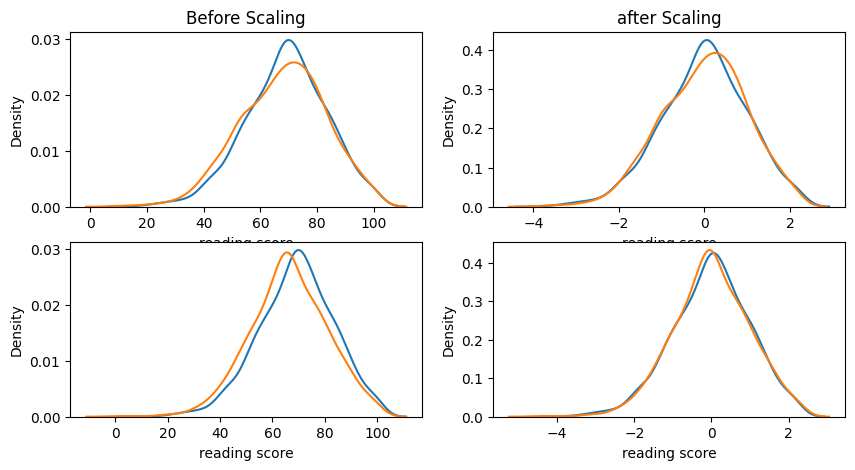

In [235]:
#manually filled Data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

sns.kdeplot(df['reading score'], ax=ax[0, 0])
sns.kdeplot(df['writing score'], ax=ax[0, 0])
ax[0, 0].set_title("Before Scaling")
sns.kdeplot(df_scaled['reading score'], ax=ax[0, 1])
sns.kdeplot(df_scaled['writing score'], ax=ax[0, 1])
ax[0, 1].set_title("after Scaling")

sns.kdeplot(df['reading score'], ax=ax[1, 0])
sns.kdeplot(df['math score'], ax=ax[1, 0])
ax[0, 0].set_title("Before Scaling")
sns.kdeplot(df_scaled['reading score'], ax=ax[1, 1])
sns.kdeplot(df_scaled['math score'], ax=ax[1, 1])
ax[0, 1].set_title("after Scaling")

plt.show()

#visualization

#univariate

In [236]:
data.columns

Index(['gender', 'race', 'parent edu', 'lunch', 'test preparation course',
       'math score', 'reading score', 'writing score', 'totalscore'],
      dtype='object')

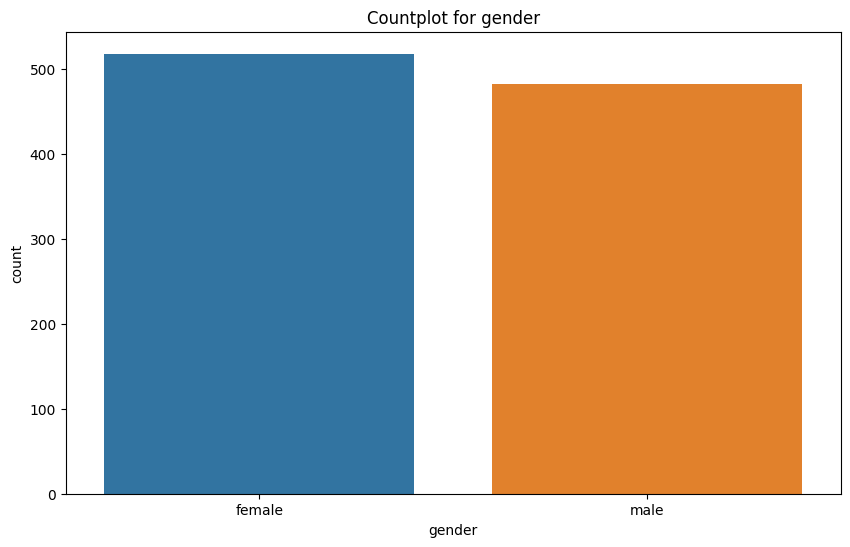

In [237]:
# Countplot for Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=data)
plt.title('Countplot for gender')
plt.show()

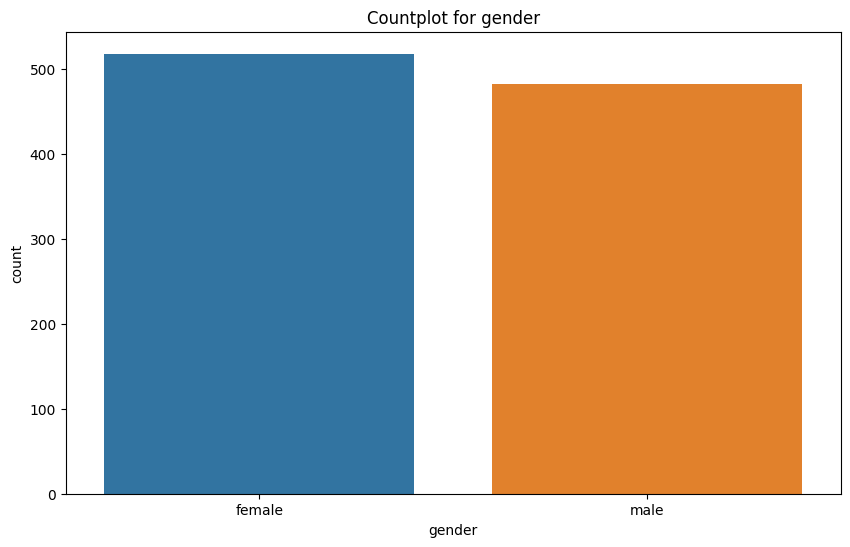

In [238]:
# Countplot for Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)
plt.title('Countplot for gender')
plt.show()

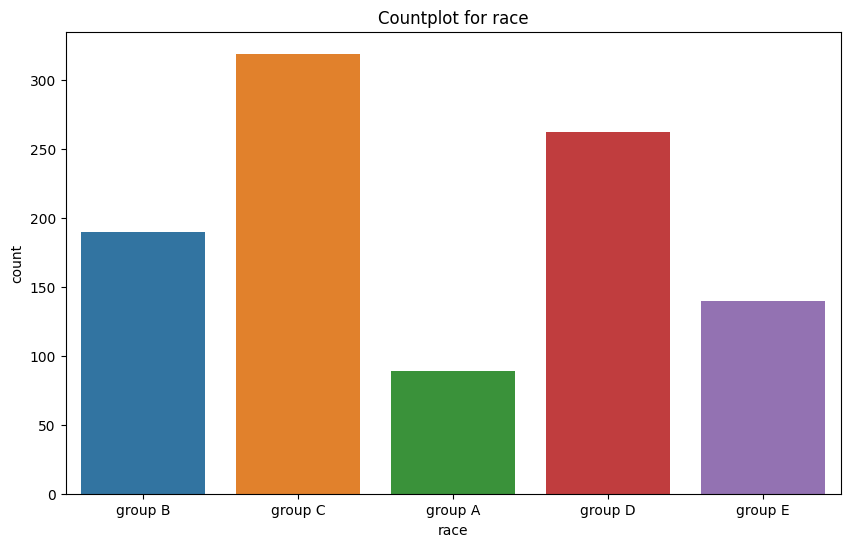

In [239]:
# Countplot for Race
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=data)
plt.title('Countplot for race')
plt.show()

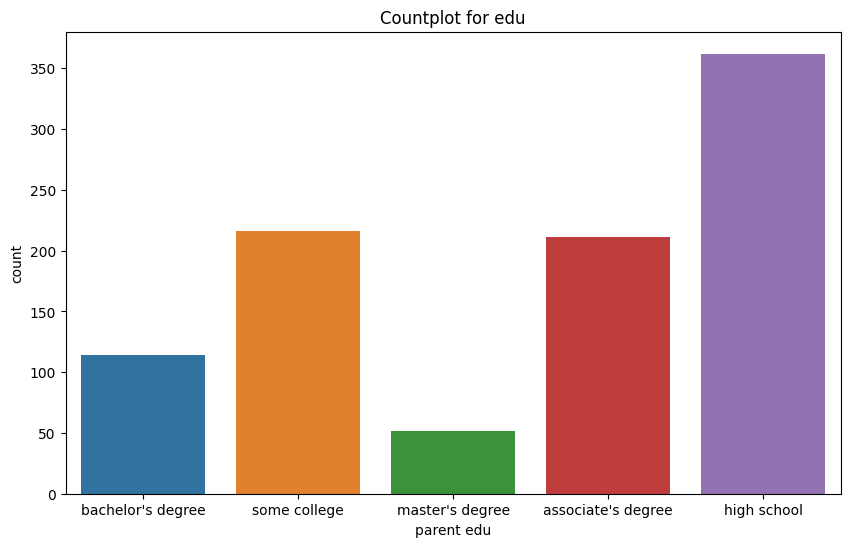

In [240]:
# Countplot for Race
plt.figure(figsize=(10, 6))
sns.countplot(x='parent edu', data=data)
plt.title('Countplot for edu')
plt.show()

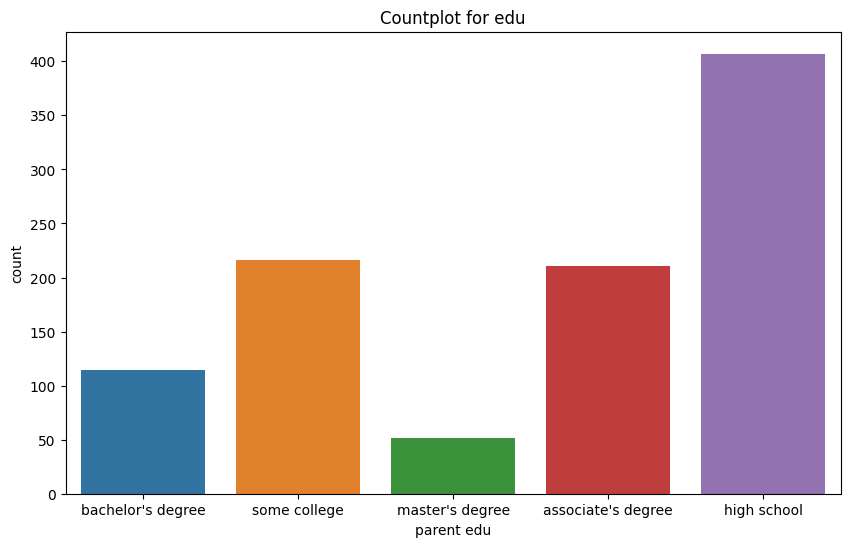

In [241]:
# Countplot for Race
plt.figure(figsize=(10, 6))
sns.countplot(x='parent edu', data=df)
plt.title('Countplot for edu')
plt.show()

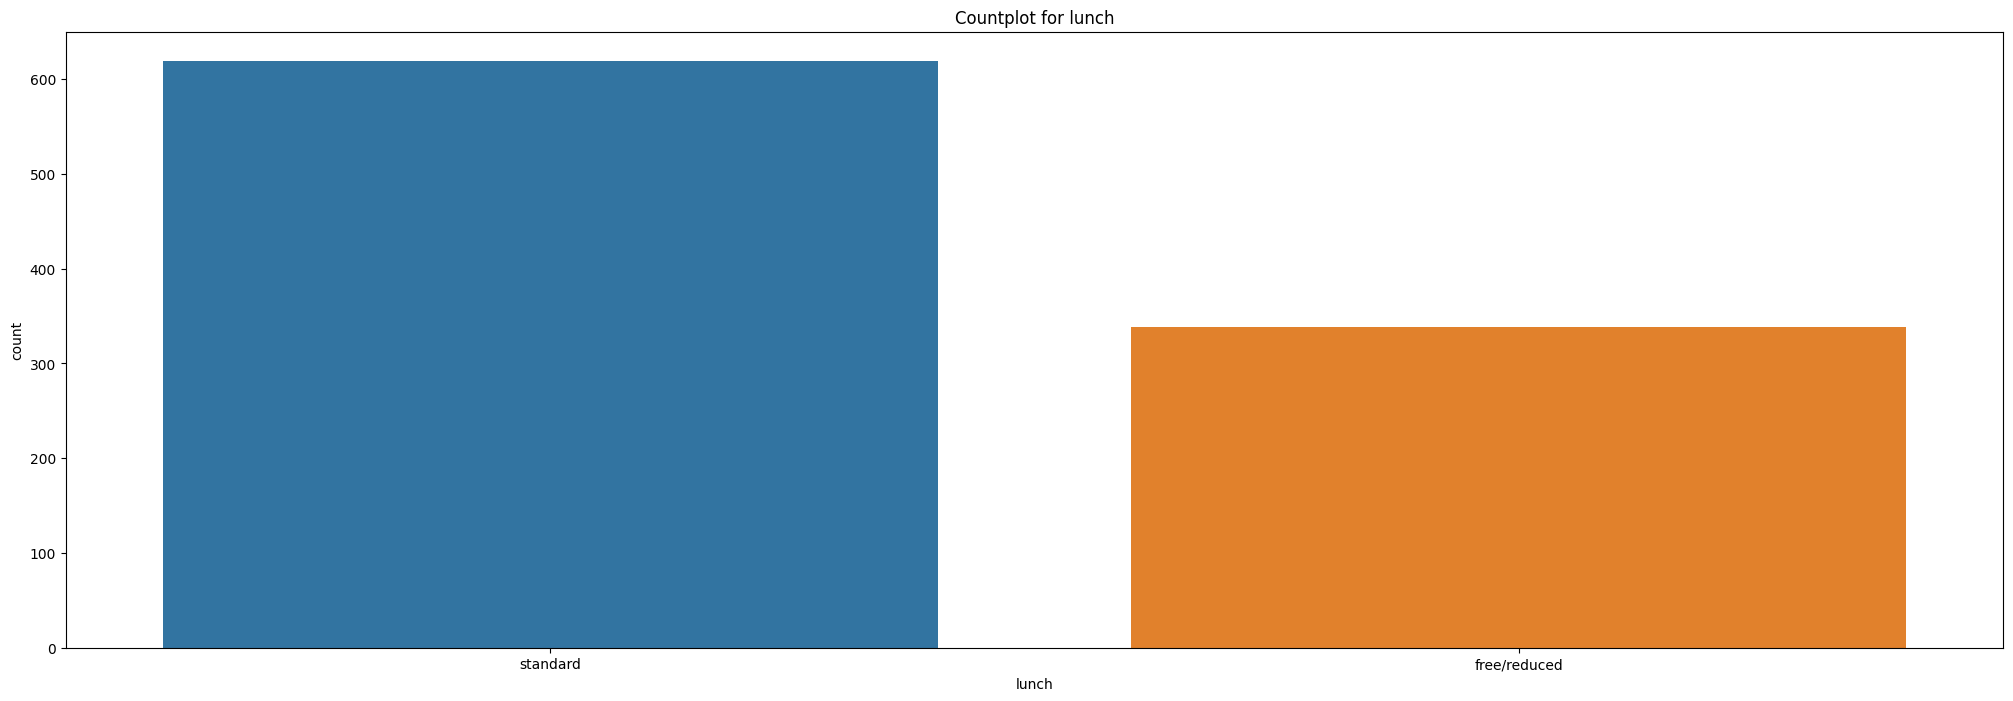

In [242]:
# Countplot for lunche column
plt.figure(figsize=(25, 8))
sns.countplot(x='lunch', data=data)
plt.title('Countplot for lunch')
plt.show()

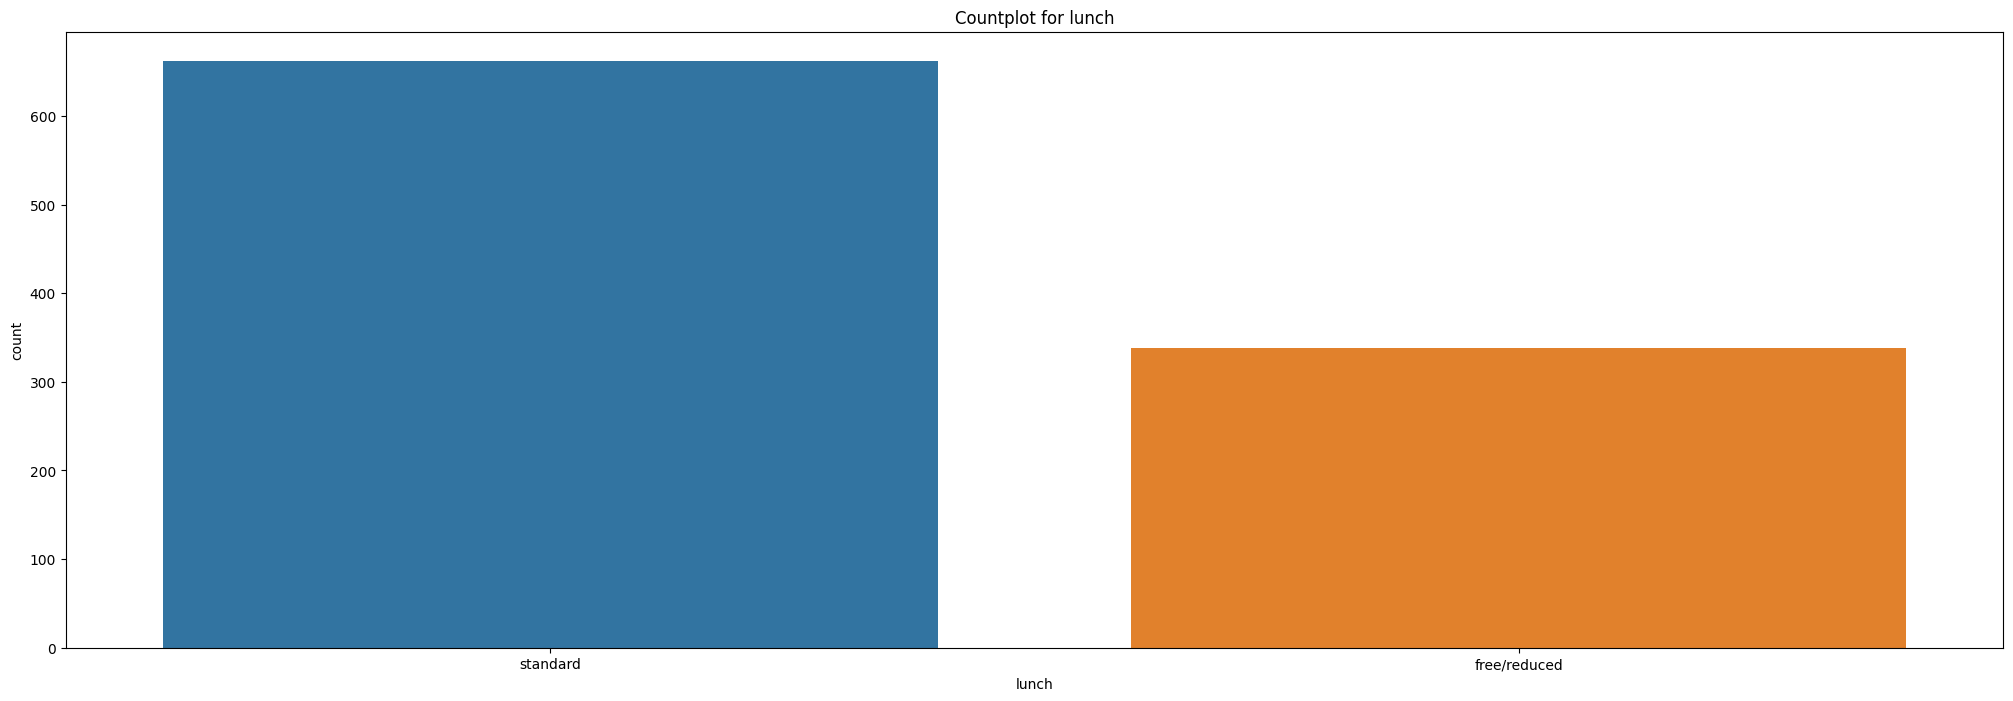

In [243]:
# Countplot for lunche column
plt.figure(figsize=(25, 8))
sns.countplot(x='lunch', data=df)
plt.title('Countplot for lunch')
plt.show()

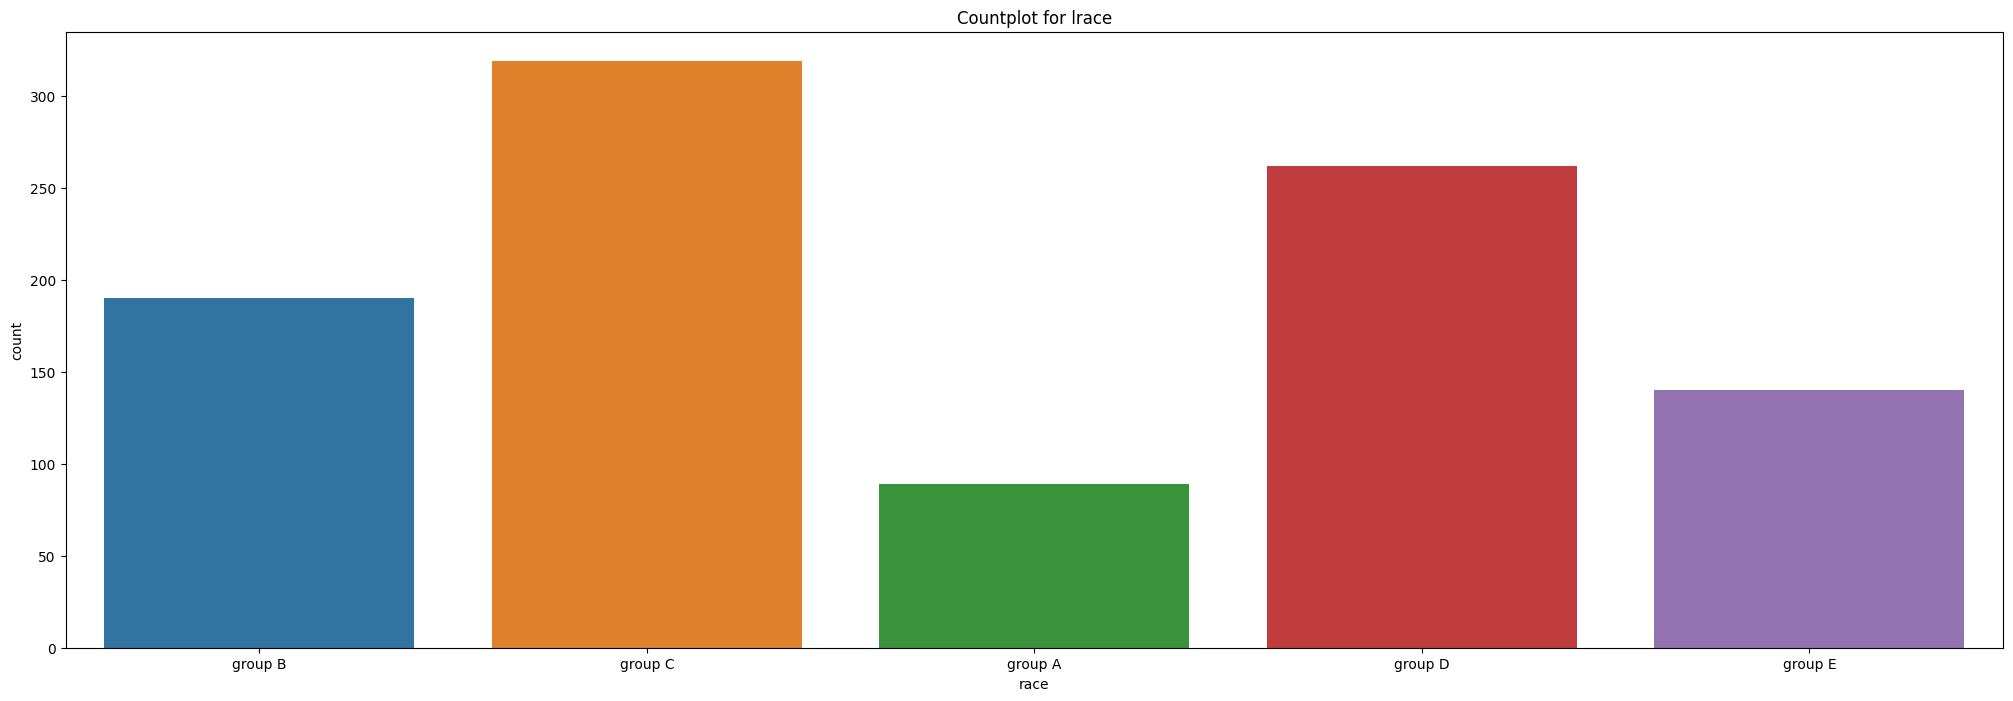

In [244]:
# Countplot for lunche column
plt.figure(figsize=(25, 8))
sns.countplot(x='race', data=data)
plt.title('Countplot for lrace')
plt.show()

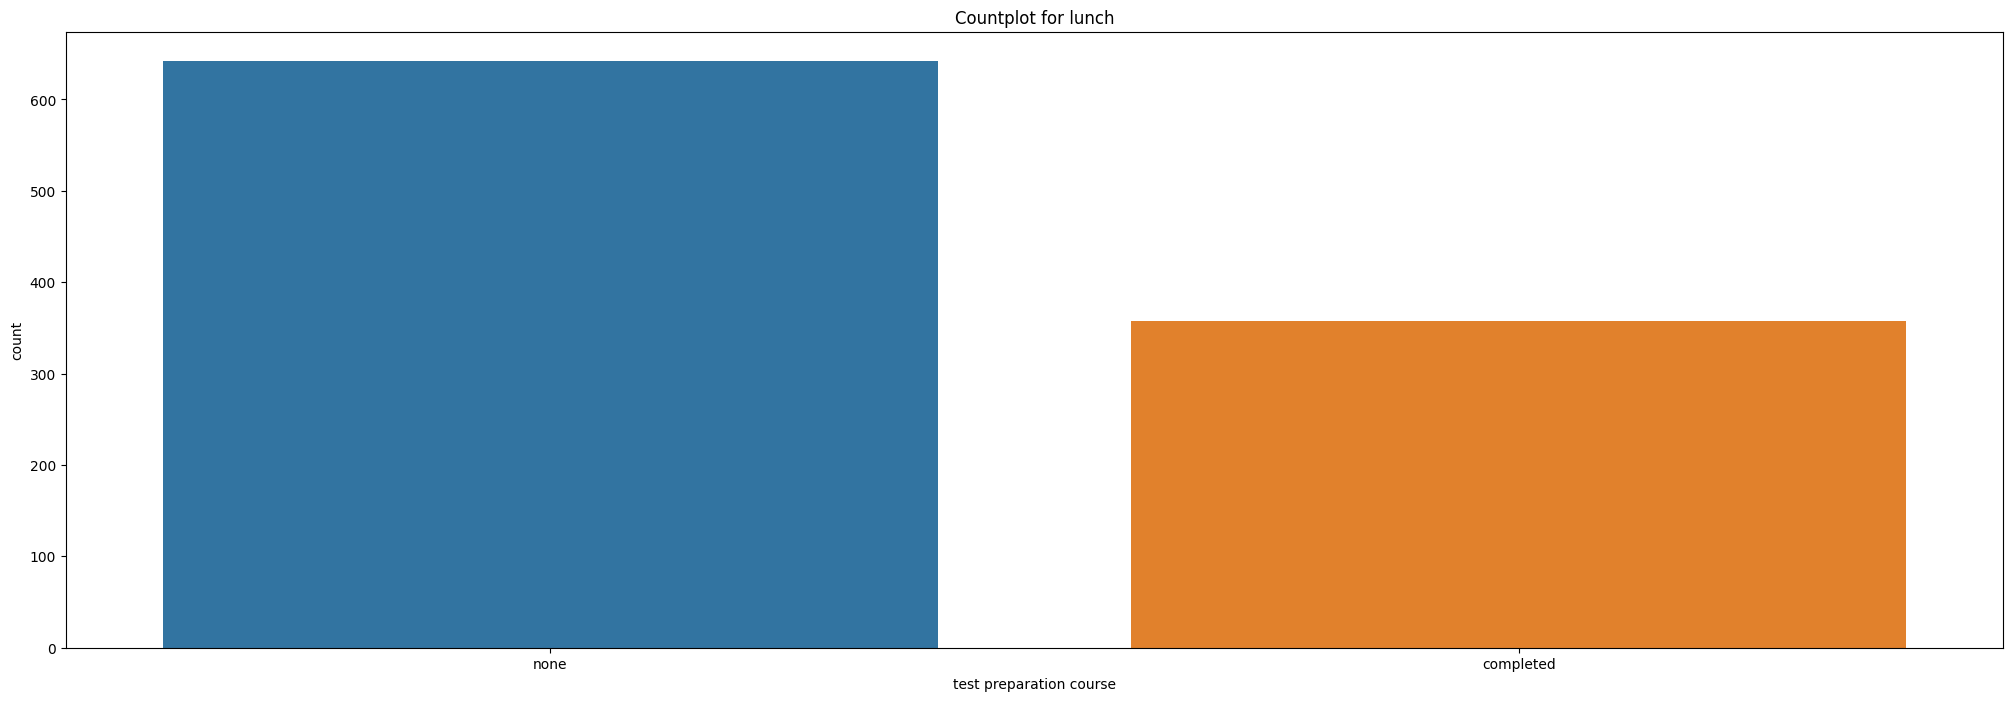

In [245]:
# Countplot for lunche column
plt.figure(figsize=(25, 8))
sns.countplot(x='test preparation course', data=data)
plt.title('Countplot for lunch')
plt.show()

#bivariate

In [246]:
df2=df.copy()

In [247]:
df2['totalscore']=(df2['math score']+df2['writing score']+df2['reading score'])/3

In [248]:
df2['totalscore']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: totalscore, Length: 1000, dtype: float64

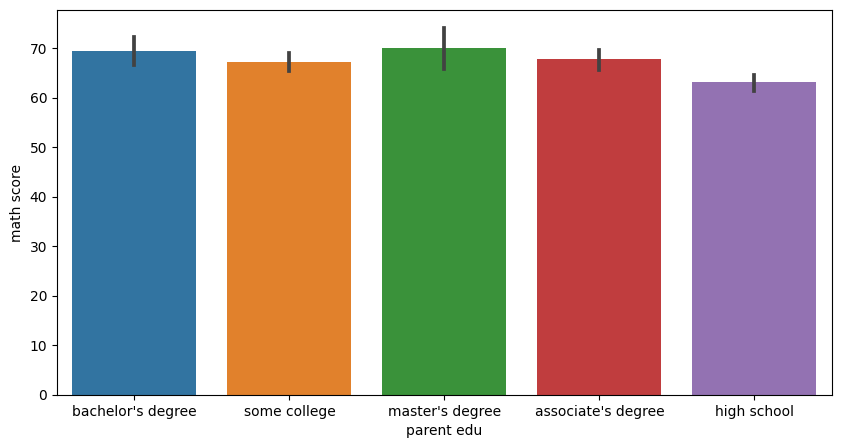

In [249]:
plt.figure(figsize = (10,5))
sns.barplot(data = data, y = "math score", x= "parent edu");

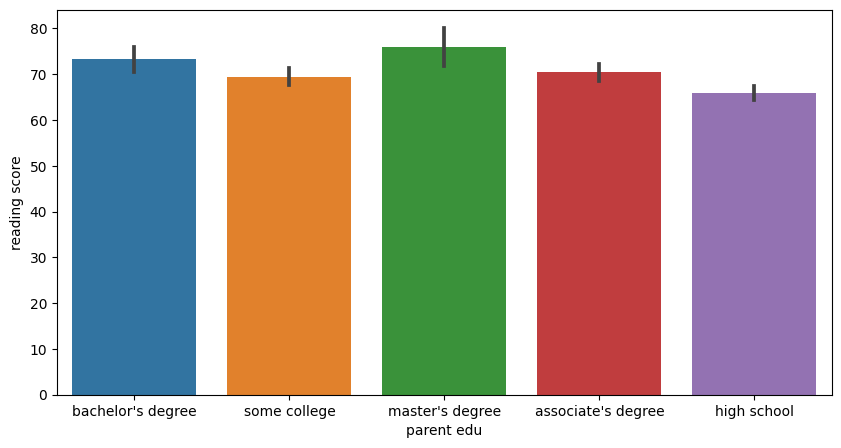

In [250]:
plt.figure(figsize = (10,5))
sns.barplot(data = data, y = "reading score", x= "parent edu");

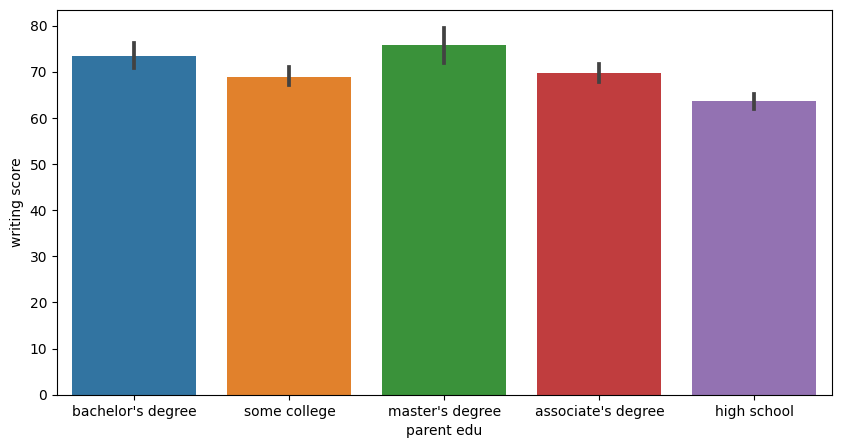

In [251]:
plt.figure(figsize = (10,5))
sns.barplot(data = data, y = "writing score", x= "parent edu");

Text(0, 0.5, 'Mean of total score')

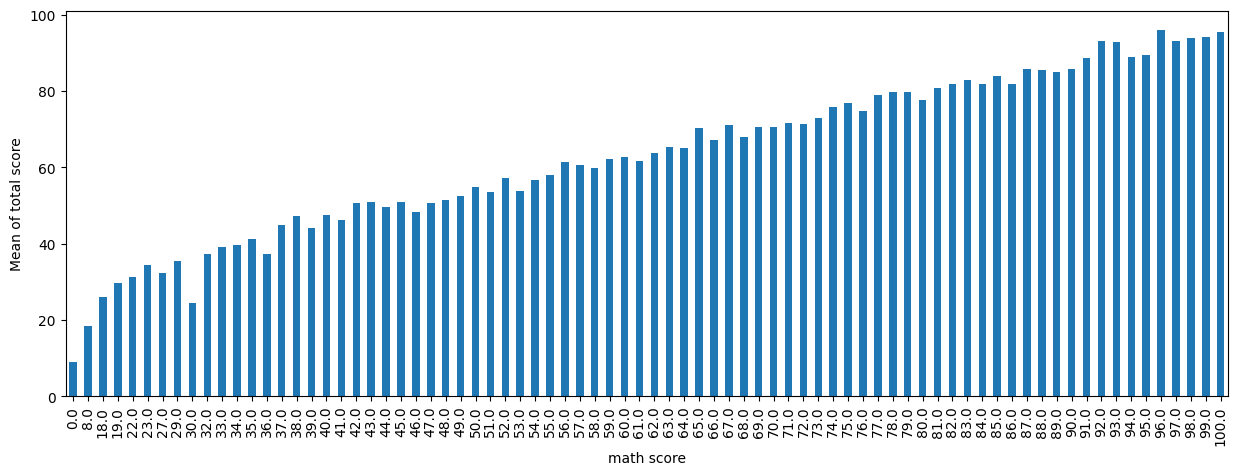

In [252]:
plt.figure(figsize=(15,5))
df2.groupby("math score")["totalscore"].mean().plot.bar()
plt.ylabel("Mean of total score")

Text(0, 0.5, 'Mean of total score')

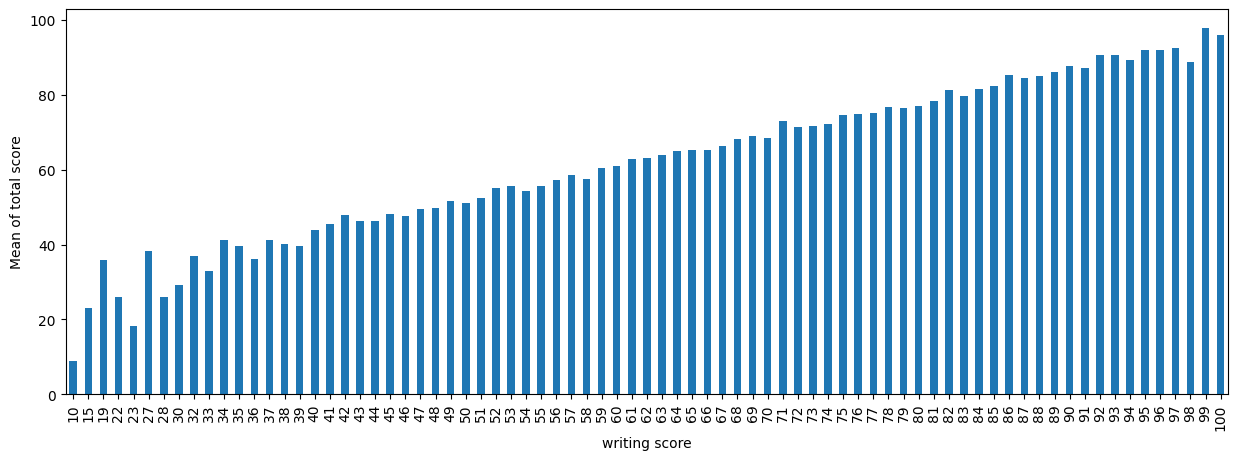

In [253]:
plt.figure(figsize=(15,5))
df2.groupby("writing score")["totalscore"].mean().plot.bar()
plt.ylabel("Mean of total score")

Text(0, 0.5, 'Mean of writing score')

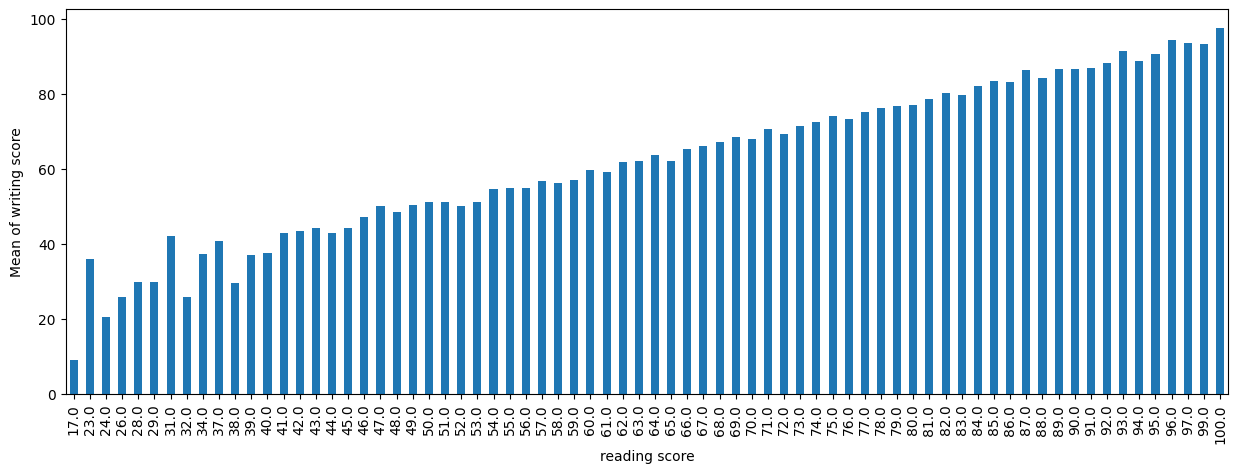

In [254]:
plt.figure(figsize=(15,5))
df2.groupby("reading score")["totalscore"].mean().plot.bar()
plt.ylabel("Mean of writing score")

Text(0, 0.5, 'Mean of writing score')

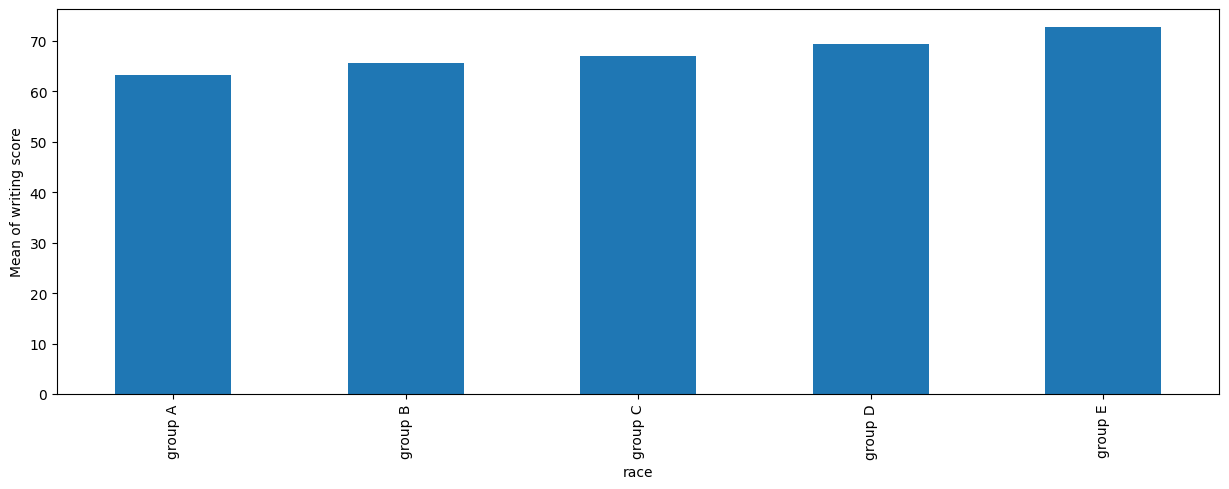

In [255]:
plt.figure(figsize=(15,5))
df2.groupby("race")["totalscore"].mean().plot.bar()
plt.ylabel("Mean of writing score")

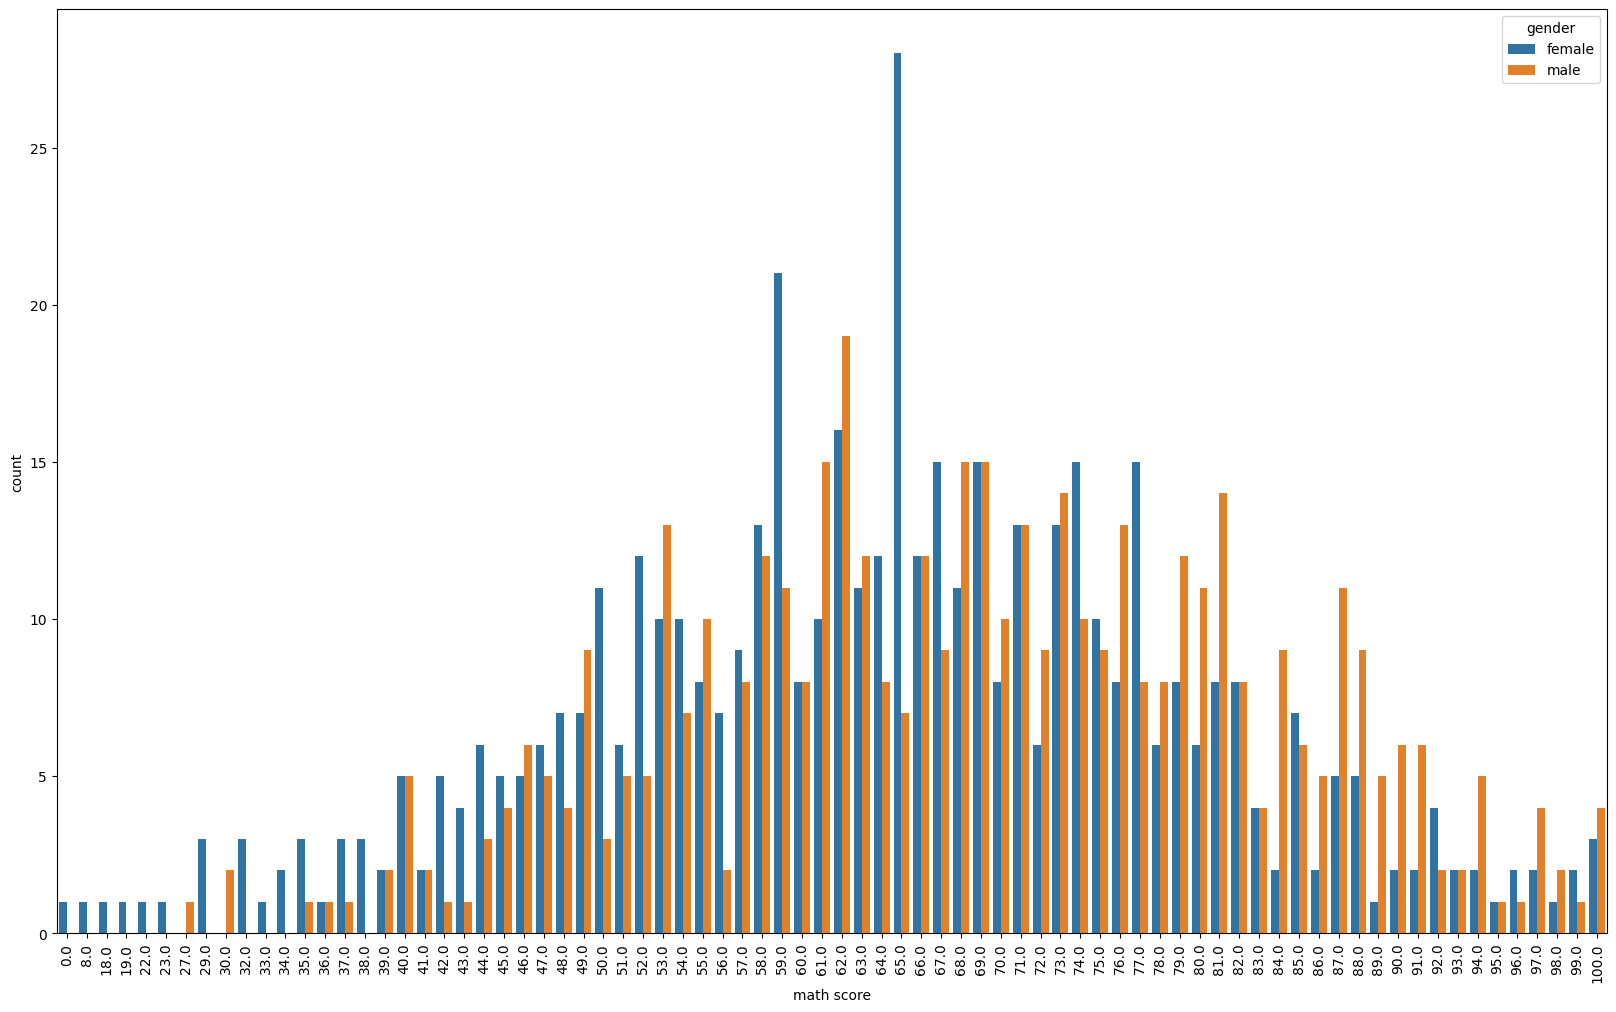

In [256]:
plt.figure(figsize=(20, 12))
sns.countplot(data = data, hue = "gender", x = "math score")
plt.xticks(rotation =90);

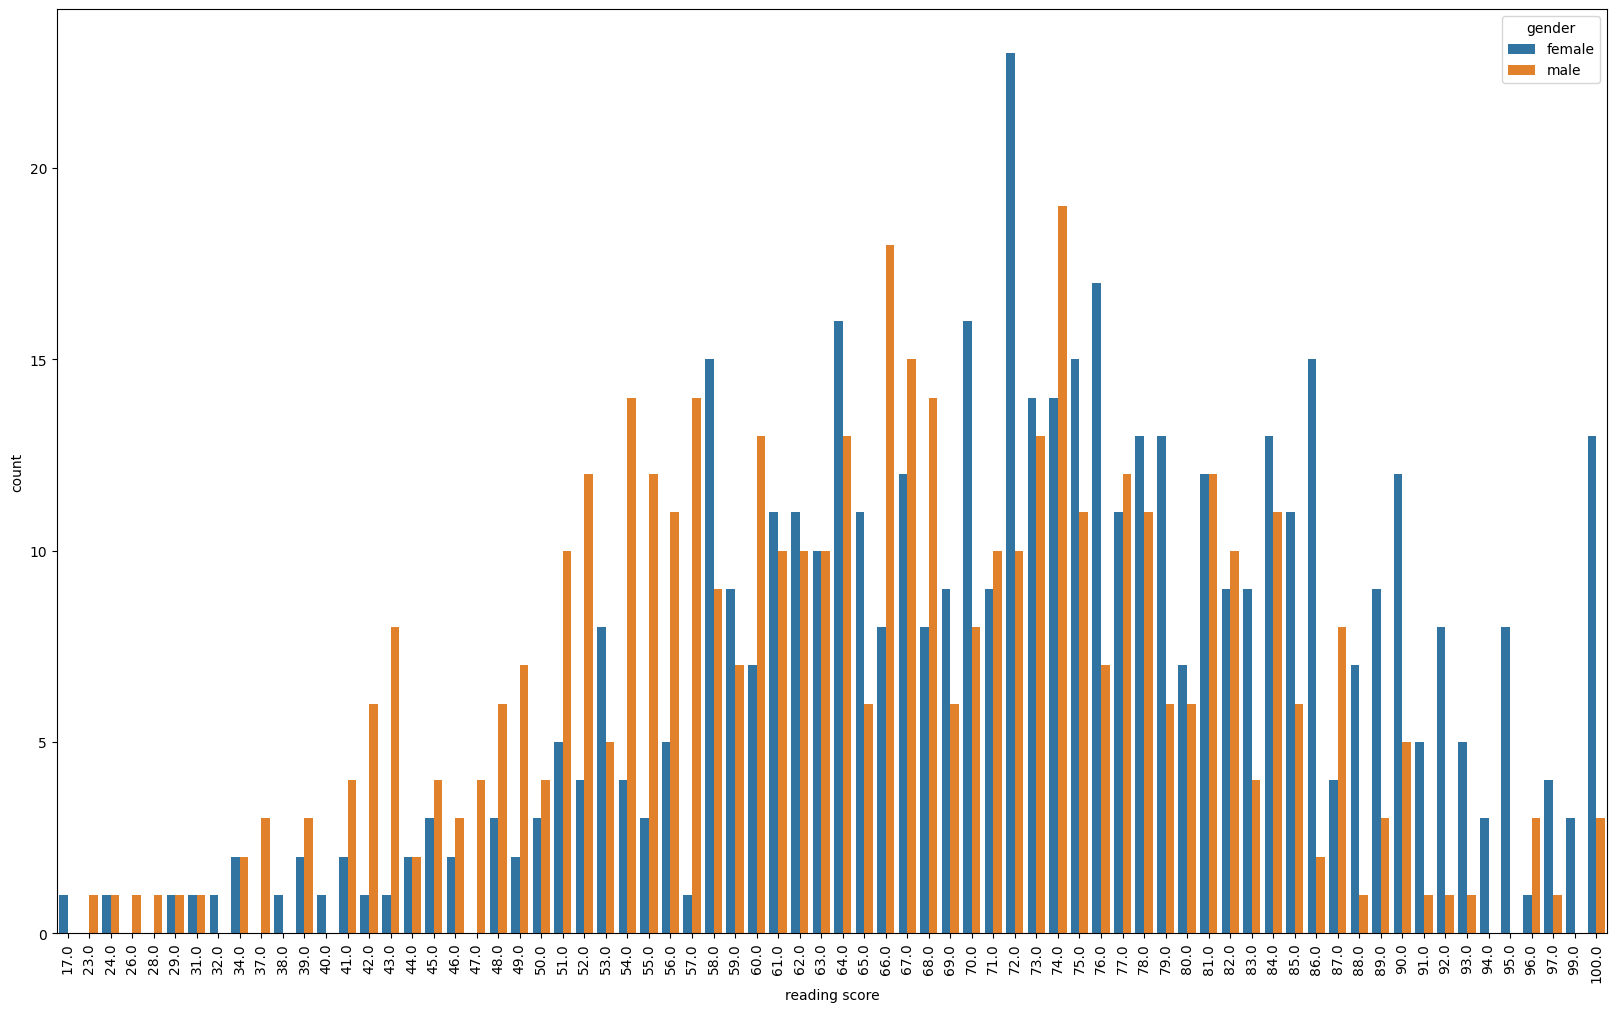

In [257]:
plt.figure(figsize=(20, 12))
sns.countplot(data = data, x = "reading score",hue = "gender")
plt.xticks(rotation =90);

multivariate

In [258]:
data['totalscore']=(data['math score']+data['writing score']+data['reading score'])/3
df_2=data.groupby('parent edu')[['math score','reading score','writing score','totalscore'] ].mean()
fig=px.bar(df_2[['math score','reading score','writing score']])
fig.add_scatter(x=df_2.index, y=df_2.totalscore, name='totalscore')
fig.show()

In [259]:
#univariate
def pie_plot(x):
  grp_df=data.groupby(x)['totalscore'].sum().reset_index()
  fig=px.pie(grp_df, names=x, values='totalscore', title=f'ratio of {x}')
  fig.show()
pie_plot('gender')
pie_plot('race')
pie_plot('parent edu')
pie_plot('lunch')
pie_plot('test preparation course')

In [260]:
list6=['math score', 'reading score','writing score']
fig=px.box()
for i in list6:
  fig.add_trace(go.Box(x=data['race'], y=data[i], name=i))
  fig.update_layout(xaxis_title='Race', yaxis_title='Score')
fig.show()

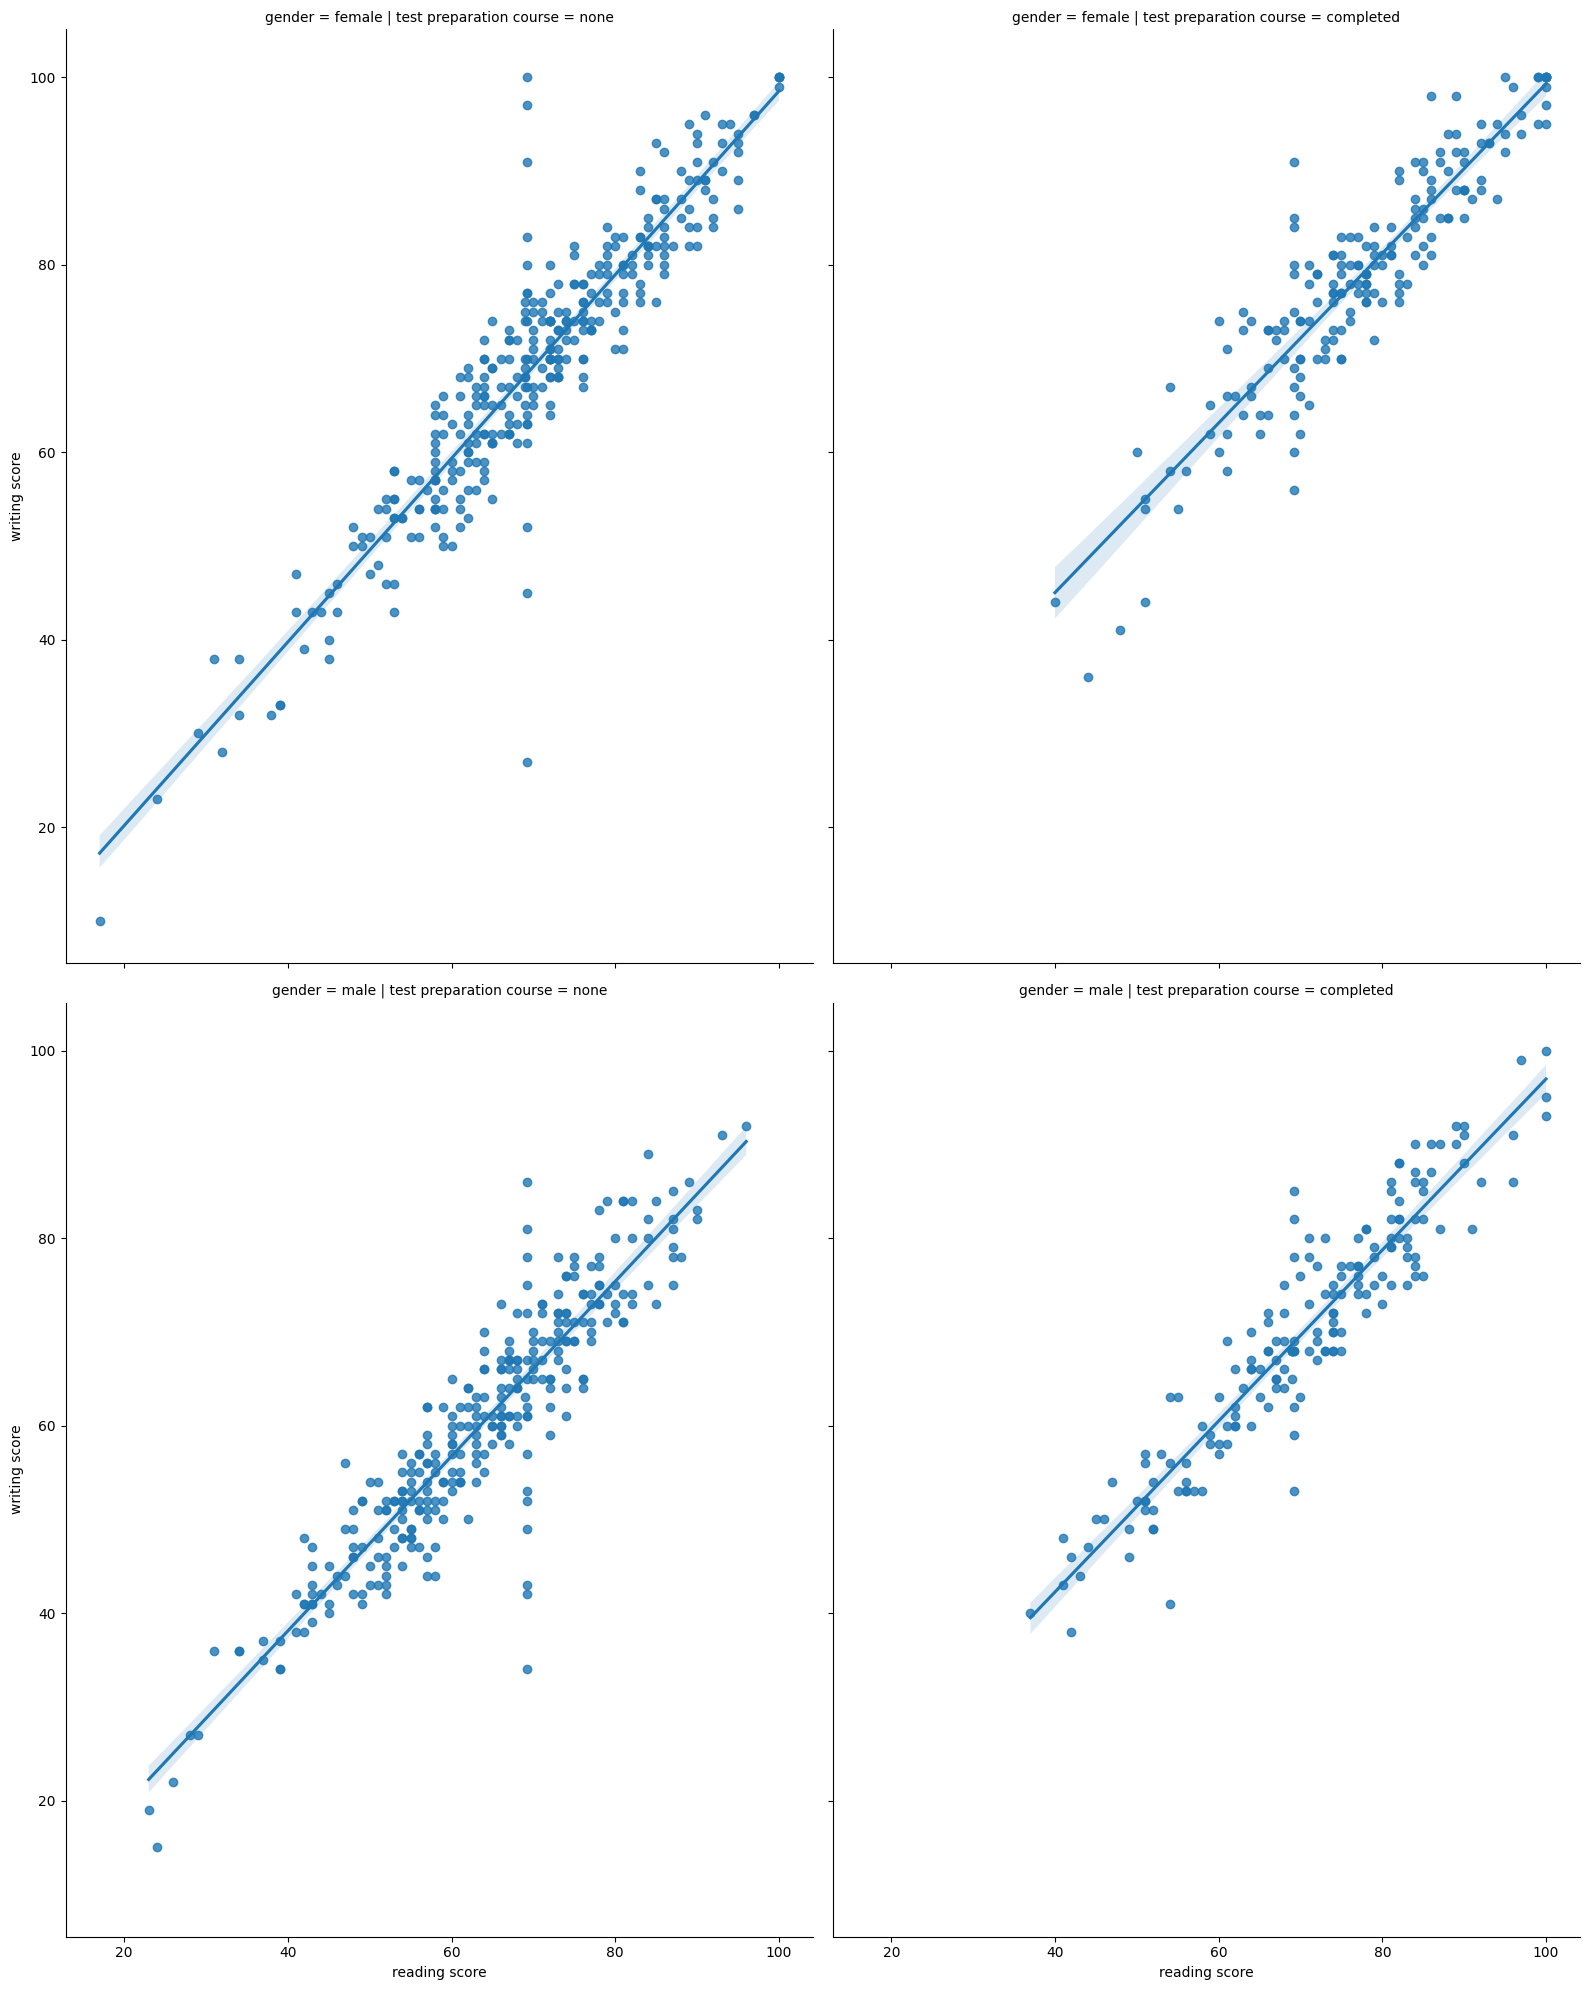

In [261]:
scores = sns.FacetGrid(data = df1, col = "test preparation course",
                       row = "gender", height = 10, aspect = 0.8)
scores.map(sns.regplot, "reading score", "writing score")

<ipython-input-262-9702e75a4255>:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



<function matplotlib.pyplot.show(close=None, block=None)>

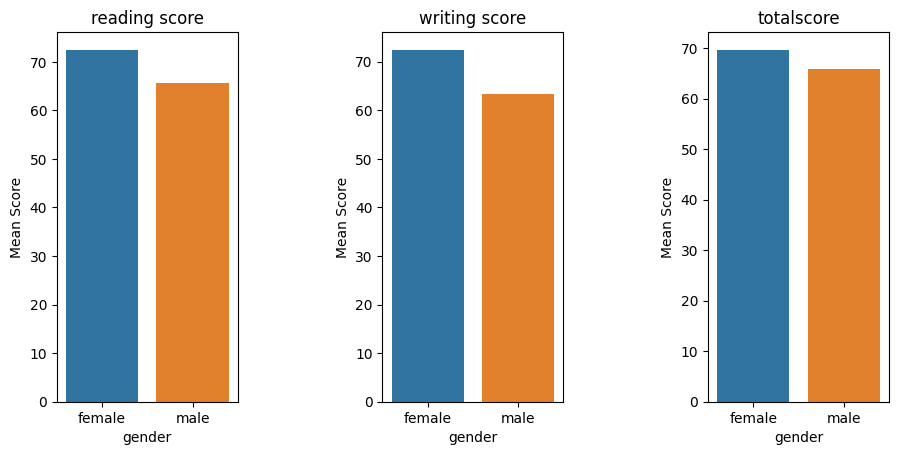

In [262]:
fig, ax = plt.subplots()
plt.subplots_adjust(wspace = 0.8, hspace = 0.8, left = 0.2, right = 1.5)
for ax in range(3):
    plt.subplot(1,3,ax+1)
    gender_df = df1.groupby(by = "gender")[list(df1.columns[-3:])[ax]].mean()
    sns.barplot(x = gender_df.index, y = gender_df.values)
    plt.ylabel("Mean Score")
    plt.title(list(df1.columns[-3:])[ax])
plt.show

<ipython-input-263-4a8c7c4f22a3>:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



<function matplotlib.pyplot.show(close=None, block=None)>

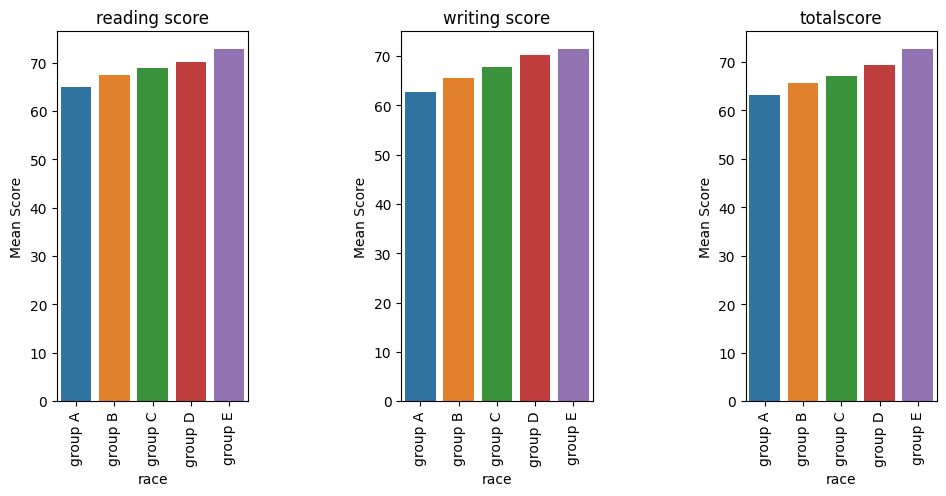

In [263]:
fig, ax = plt.subplots()
plt.subplots_adjust(wspace = 0.8, right = 1.5)
for ax in range(3):
    plt.subplot(1,3,ax+1)
    ethnicity_df = df1.groupby("race")[list(df1.columns[-3:])[ax]].mean()
    sns.barplot(x = ethnicity_df.index, y = ethnicity_df.values)
    plt.xticks(rotation = 90)
    plt.ylabel("Mean Score")
    plt.title(list(df1.columns[-3:])[ax])
plt.show

for manually filled data

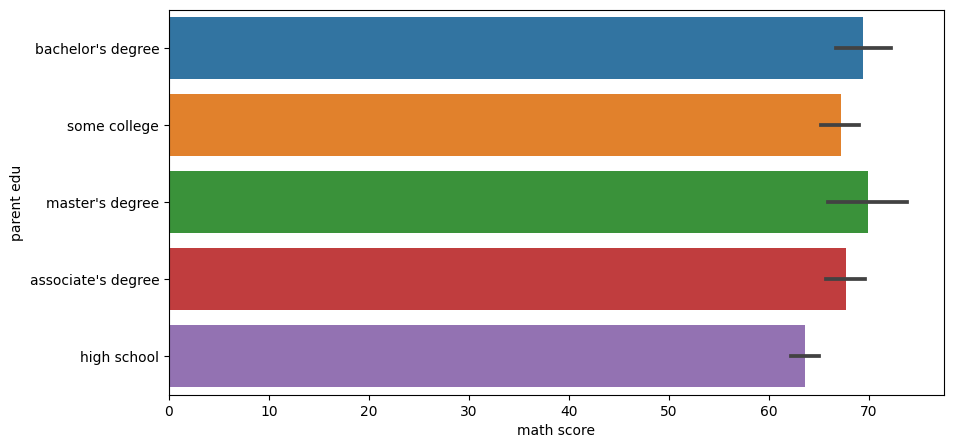

In [264]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, x = "math score", y= "parent edu");

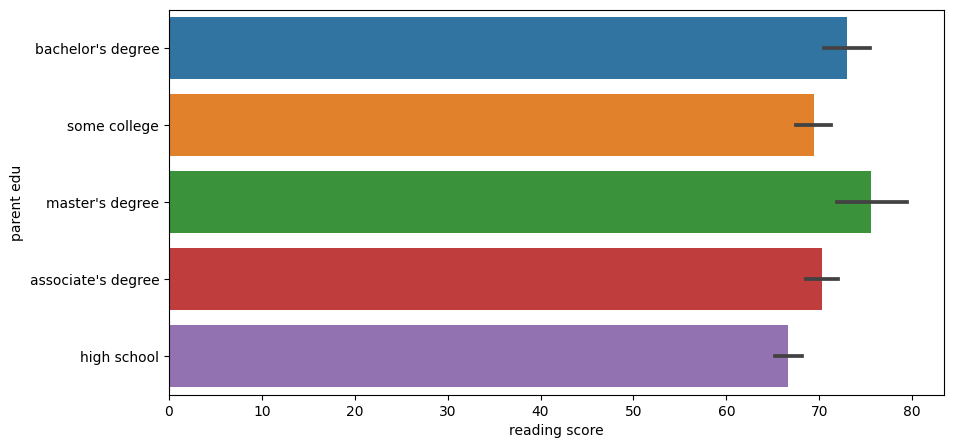

In [265]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, x = "reading score", y= "parent edu");

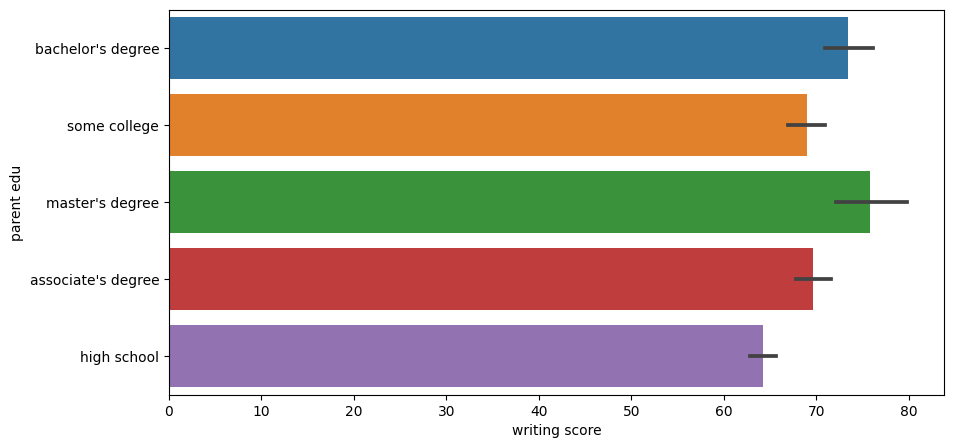

In [266]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, x = "writing score", y= "parent edu");

In [267]:
df['totalscore']=(df['math score']+df['reading score']+df['writing score'])/3

In [268]:
df['parent edu']

0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998           high school
999          some college
Name: parent edu, Length: 1000, dtype: object

In [269]:
corr_df=df.copy()

In [270]:
# d1 = {'male':0,'female':1}
# d2 = {'group A':0,'group B':1,'group C':2,'group D':3,'group E':4}
# d3 = {"bachelor's degree":0,"some college":1,"master's degree":2,"associate's degree":3,"high school":4}
# d4 = {'standard':0,'free/reduced':1}
# d5 = {'none':0,'completed':1}

In [271]:
# # corr_df['gender'] = corr_df['gender'].map(d1)
# corr_df['race'] = corr_df['race'].map(d2)
# corr_df['parent  edu'] = corr_df['parental level of education'].map(d3)
# corr_df['lunch'] = corr_df['lunch'].map(d4)
# corr_df['test preparation course'] = corr_df['test preparation course'].map(d5)

#multivariate

<ipython-input-272-8df7bcac526d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

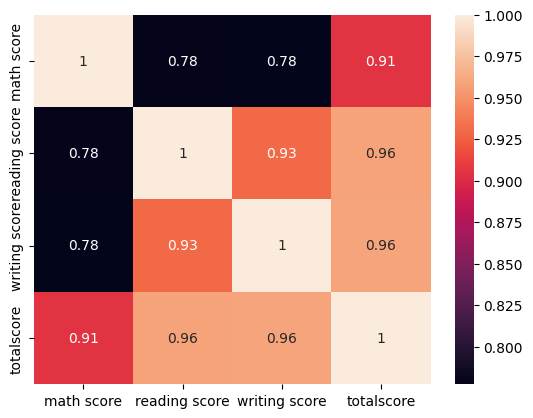

In [272]:

sns.heatmap(df.corr(),annot=True)

#linear regression

In [273]:
data['totalscore']=(data['math score']+data['writing score']+data['reading score'])/3

In [274]:
df['totalscore']=(df['math score']+df['writing score']+df['reading score'])/3

In [275]:
data.head()

,gender,race,parent edu,lunch,test preparation course,math score,reading score,writing score,totalscore
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44,49.333333
4,male,group C,some college,standard,none,76.0,78.0,75,76.333333


Text(0, 0.5, 'reading score')

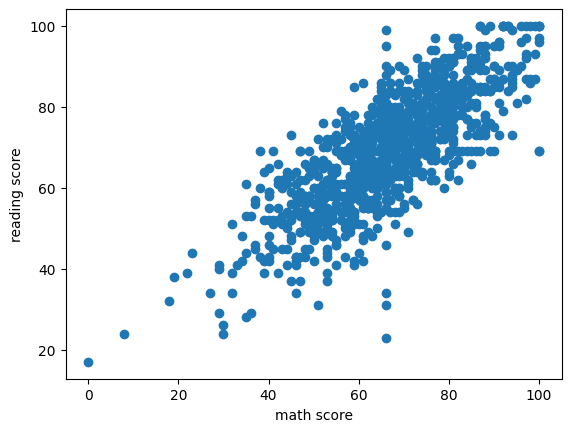

In [276]:
plt.scatter(df['math score'],df['reading score'])
plt.xlabel('math score')
plt.ylabel('reading score')

Text(0, 0.5, 'total score')

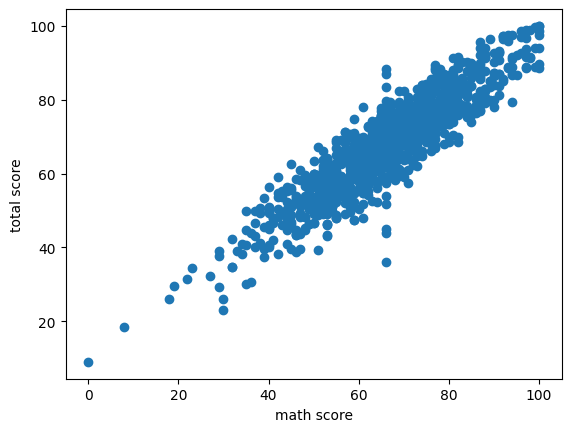

In [277]:
plt.scatter(df['math score'],df['totalscore'])
plt.xlabel('math score')
plt.ylabel('total score')

linear regression from scratch

In [278]:
def linear_regression(X, Y):
    n = len(X)

    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    numer = np.sum((X - mean_x) * (Y - mean_y))
    denom = np.sum((X - mean_x) ** 2)
    m = numer / denom
    c = mean_y - m * mean_x

    return m, c

In [279]:
slope, intercept = linear_regression(df['math score'], df['totalscore'])
predicted_totalscore = slope * df['math score'] + intercept


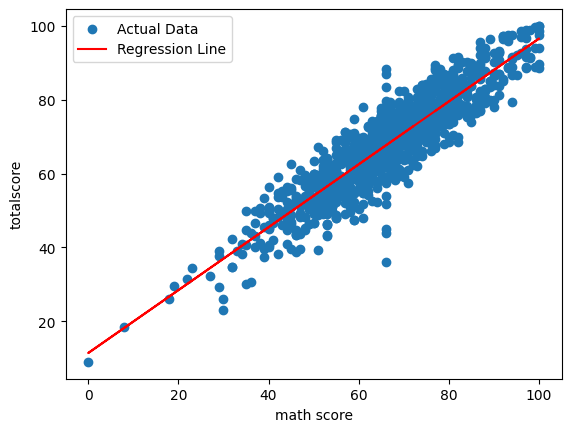

In [280]:
plt.scatter(df['math score'], df['totalscore'], label='Actual Data')
plt.plot(df['math score'], predicted_totalscore, label='Regression Line', color='red')
plt.xlabel('math score')
plt.ylabel('totalscore')
plt.legend()
plt.show()

In [281]:
print(f"Slope (m): {slope}")
print(f"Intercept (c): {intercept}")

Slope (m): 0.851854651163479
Intercept (c): 11.40748126545828


In [282]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
actual_totalscore = df['totalscore']

In [283]:
mae = mean_absolute_error(actual_totalscore, predicted_totalscore)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 4.747140673794903


In [284]:
mse = mean_squared_error(actual_totalscore, predicted_totalscore)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 34.709170027108016


In [285]:
rmse = mean_squared_error(actual_totalscore, predicted_totalscore, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 5.891448890307716


In [286]:
r2 = r2_score(actual_totalscore, predicted_totalscore)
print("R-squared (R^2):", r2)

R-squared (R^2): 0.8192251232312573


it has an accuracy of 81.92%

#using sklearn

In [287]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[['math score']],df['totalscore'],test_size=0.2,random_state=2)

In [288]:
from sklearn.linear_model import LinearRegression

In [289]:
lr = LinearRegression()

In [290]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0.5, 0, 'totalscore')

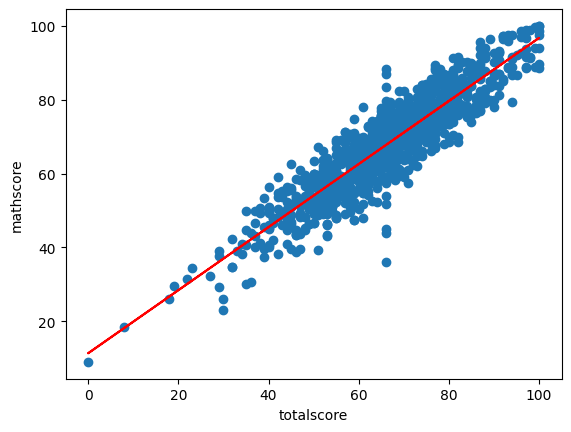

In [291]:
plt.scatter(df['math score'], df['totalscore'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.ylabel('mathscore')
plt.xlabel('totalscore')

In [292]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [293]:
y_pred = lr.predict(X_test)

In [294]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 5.0473943610645975


In [295]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 38.995530704792024


In [296]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 6.2446401581509905


In [297]:
print("MSE",r2_score(y_test,y_pred))

MSE 0.7889919189564387


In [336]:
r2 = r2_score(y_test,y_pred)


In [299]:
X_test.shape

(200, 1)

In [300]:
1 - ((1-r2)*(200-1)/(200-1-1))

0.7879262215774309

random forest

In [301]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

In [302]:
X_train,X_test,y_train,y_test = train_test_split(df[['math score']],df['totalscore'],test_size=0.2,random_state=2)

In [303]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 5.275321622341682
Mean Squared Error (MSE): 42.22490612378838
Root Mean Squared Error (RMSE): 6.498069415125417
R-squared (R^2): 0.771517498226272


In [304]:
X_test.shape

(200, 1)

In [305]:
1 - ((1-r2)*(200-1)/(200-1-1))

0.7703635461971118

Text(0.5, 0, 'mathscore')

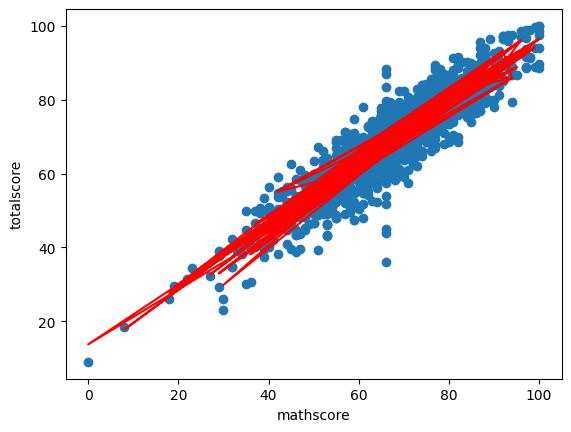

In [306]:
plt.scatter(df['math score'], df['totalscore'])
plt.plot(X_train,rf_model.predict(X_train),color='red')
plt.ylabel('totalscore')
plt.xlabel('mathscore')

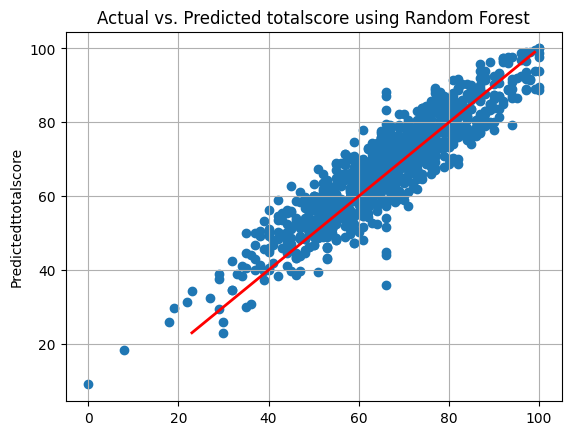

In [307]:
plt.ylabel("Predictedttotalscore")
plt.title("Actual vs. Predicted totalscore using Random Forest")
plt.grid(True)
plt.scatter(df['math score'], df['totalscore'])
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()

#multiple lr

In [308]:
X_train,X_test,y_train,y_test = train_test_split(df[['math score', 'reading score']],df['totalscore'],test_size=0.2,random_state=2)

In [309]:
lr = LinearRegression()

In [310]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0.5, 0, 'mathscore')

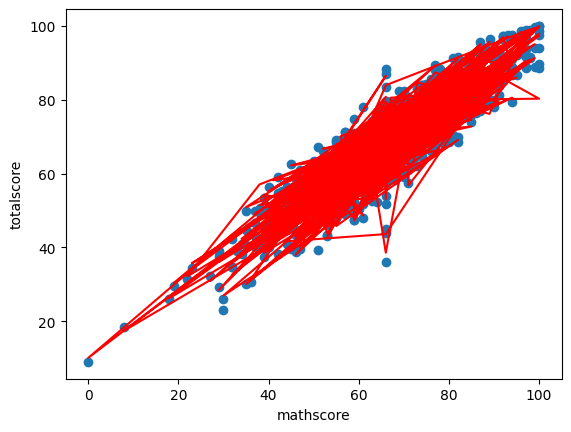

In [311]:
plt.scatter(df['math score'], df['totalscore'])
plt.plot(X_train['math score'],lr.predict(X_train),color='red')
plt.ylabel('totalscore')
plt.xlabel('mathscore')

In [312]:
y_pred = lr.predict(X_test)

In [313]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.3854884817502897


In [314]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 4.067348040974909


In [315]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 2.016766729439701


In [316]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.9779912392638129


In [317]:
X_test.shape

(200, 2)

In [318]:
1 - ((1-r2)*(200-1)/(200-2-1))

0.9777678000685217

using random forest

In [319]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor


In [320]:
X = df[['math score', 'reading score']]
y = df['totalscore']

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [322]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2", r2)

Mean Absolute Error (MAE): 1.4746667399786293
Mean Squared Error (MSE): 3.997504752215562
Root Mean Squared Error (RMSE): 1.9993760907381988
R-squared (R^2 0.9798286024638903


In [323]:
X_test.shape

(200, 2)

In [324]:
1 - ((1-r2)*(200-1)/(200-1-1))

0.9797267267187584

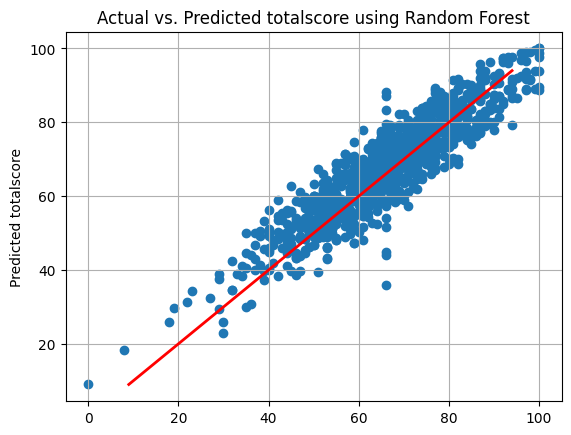

In [325]:
plt.ylabel("Predicted totalscore")
plt.title("Actual vs. Predicted totalscore using Random Forest")
plt.grid(True)
plt.scatter(df['math score'], df['totalscore'])
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],  color='red', linewidth=2)

plt.show()

knn

Mean Absolute Error (MAE): 1.6710000000000007
Mean Squared Error (MSE): 5.92837777777778
Root Mean Squared Error (RMSE): 2.4348260261829346
R-squared (R^2): 0.9700854227043716
X_test shape: (200, 2)
Adjusted R score: 0.9697817214120302


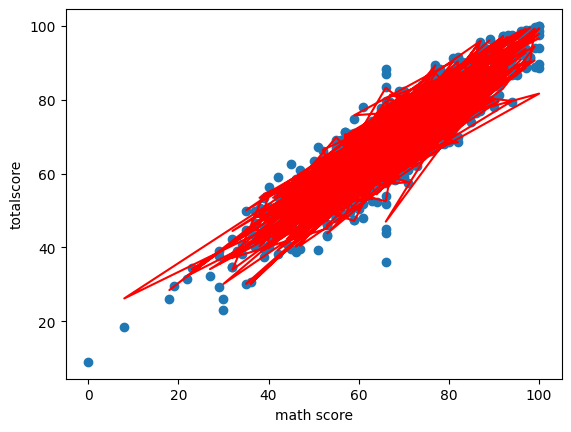

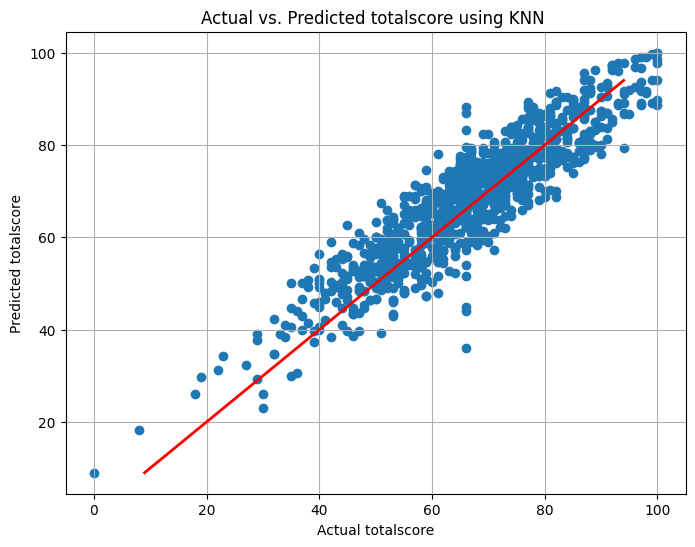

In [326]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

X = df[['math score', 'reading score']]
y = df['totalscore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)
shape = X_test.shape

final = 1 - ((1-r2)*(200-1)/(200-2-1))
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)
print("X_test shape:", shape)
print("Adjusted R score:", final)

plt.scatter(df['math score'], df['totalscore'])
plt.plot(X_train['math score'],knn_model.predict(X_train),color='red')
plt.ylabel('totalscore')
plt.xlabel('math score')



plt.figure(figsize=(8, 6))
plt.scatter(df['math score'], df['totalscore'])
plt.xlabel("Actual totalscore")
plt.ylabel("Predicted totalscore")
plt.title("Actual vs. Predicted totalscore using KNN ")
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()



ridge

In [327]:
from sklearn.linear_model import Ridge

X = df[['math score', 'reading score']]
y = df['totalscore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

shape = X_test.shape
final = 1 - ((1-r2)*(589-1)/(589-2-1))

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

print("X_test shape:", shape)
print("Adjusted R score:", final)


Mean Absolute Error (MAE): 1.4078595357243433
Mean Squared Error (MSE): 3.335496450824826
Root Mean Squared Error (RMSE): 1.82633415639768
R-squared (R^2): 0.9831690944575912
X_test shape: (200, 2)
Adjusted R score: 0.9831116510939651


lasso

In [328]:

from sklearn.linear_model import Lasso


X = df[['math score', 'reading score']]
y = df['totalscore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lasso_model = Lasso(alpha=1.0)

Lasso_model.fit(X_train, y_train)

y_pred = Lasso_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

shape = X_test.shape
final = 1 - ((1-r2)*(584-1)/(584-2-1))

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

print("X_test shape:", shape)
print("Adjusted R score:", final)


Mean Absolute Error (MAE): 1.4084083956379505
Mean Squared Error (MSE): 3.332492831845471
Root Mean Squared Error (RMSE): 1.825511663026416
R-squared (R^2): 0.9831842507103626
X_test shape: (200, 2)
Adjusted R score: 0.9831263651706392


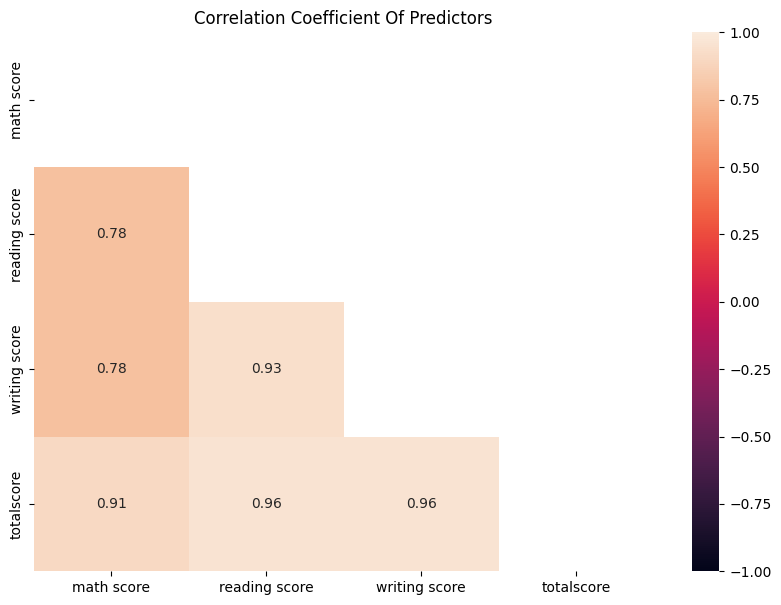

In [329]:
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(df[['math score','reading score','writing score','totalscore']].corr(), dtype=bool))
sns.heatmap(df[['math score','reading score','writing score','totalscore']].corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [330]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_train2,X_test2,y_train2,y_test2 = train_test_split(df[['math score','reading score','writing score']],df['totalscore'],test_size=0.2,random_state=2)
# compute the vif for all given features
def compute_vif(considered_features):

    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

  # features to consider removing
considered_features = ['math score','reading score','writing score']


# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-330-c3b90a75b8af>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
1,reading score,7.851398
2,writing score,7.822731
0,math score,2.679440


In [331]:
considered_features.remove('reading score')
compute_vif(considered_features)

<ipython-input-330-c3b90a75b8af>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
0,math score,2.526028
1,writing score,2.526028


minmaxscaler

In [332]:
# load libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


# creating datasets with and without feature removal
new_df2 = df[['math score','reading score','writing score','totalscore']]
new_df2.dropna(axis=0)
# find all categorical features
cat_var = [var for var in new_df2.columns if new_df2[var].dtypes=='object']

# one hot-encode all categorical features
# ohe = pd.get_dummies(new_df2[cat_var])

#  dataframe with removed features
df_fs = new_df2.drop(['reading score'], axis = 1)
# df_fs = pd.concat([df_fs, ohe], axis=1)
# df_fs = df_fs.drop(cat_var, axis=1)

# dataframe without removed features
# df = pd.concat([new_df2, ohe], axis=1)
df = new_df2.drop(cat_var, axis=1)

# train test split for both datasets

X = new_df2.drop('totalscore', axis=1)
y = new_df2['totalscore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_fs = df_fs.drop('totalscore', axis=1)
y_fs = df_fs['totalscore']

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.25, random_state=42)

# Standardization for both datasets

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

mms_fs = MinMaxScaler()
X_train_fs = mms_fs.fit_transform(X_train_fs)
X_test_fs = mms_fs.transform(X_test_fs)

# making predictions with models for both datasets
# without features selection
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#with feature selection
lr_fs = LinearRegression()
lr_fs.fit(X_train_fs, y_train_fs)
y_pred_fs = lr_fs.predict(X_test_fs)

In [333]:
# load library
from sklearn.metrics import mean_squared_error

# compute mean_squared errors for both models
mse = mean_squared_error(y_test, y_pred)
mse_fs = mean_squared_error(y_test_fs, y_pred_fs)

print('Mean squared error without feature selection: {}'.format(np.round(mse,2)))
print('Mean squared error with feature selection: {}'.format(np.round(mse_fs,2)))

Mean squared error without feature selection: 0.0
Mean squared error with feature selection: 2.81


In [334]:
# find coefficients of each feature in the data without feature selection
importance = lr.coef_
dict_importance = {X.columns[i]:importance[i] for i in range(len(X.columns))}

# find coefficients of each feature in the data with feature selection
importance_fs = lr_fs.coef_
dict_importance_fs = {X_fs.columns[i]:importance_fs[i] for i in range(len(X_fs.columns))}

# features to assess
features = ['math score','writing score']
feature_importance = [dict_importance[feature] for feature in features]
feature_importance_fs = [dict_importance_fs[feature] for feature in features]

# tabulate the coefficient values of each feature with and without feature selection
importance = pd.DataFrame()
importance['Feature'] = features
importance['Feature Importance (Without Feature Selection)'] = feature_importance
importance['Feature Importance (With Feature Selection)'] = feature_importance_fs
importance



,Feature,Feature Importance (Without Feature Selection),Feature Importance (With Feature Selection)
0,math score,30.666667,35.123594
1,writing score,25.666667,45.031641
